### author by yangshichen
### 注意：脚本仅供参考，使用前请仔细阅读

In [1]:
library(ggplot2)
library(future)
library(tidyverse)
library(ggpubr)
library(ggchicklet)
library(ggsci)
library(magrittr)
library(ggh4x)
library(rstatix)
library(ggsignif)
library(ggnewscale)
library(patchwork)
library(gapminder)
library(ggprism)
library(dplyr)
library(ggplotify)
library(readr)
library(arrow)
library(ggbreak)
library(lme4)
library(Matrix)
library(lmtest)
library(pbmcapply)
library(data.table)
library(arrow)
library(Seurat)
library(UpSetR)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

载入程序包：‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



载入程序包：‘rstatix’


The following object is masked from ‘package:stats’:

    filter



载入程序包：‘arrow’


The following object is masked from ‘package:magrittr’:

    is_in


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp


ggbreak v0.1.5 Learn more 

In [2]:
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6, angle = 30,hjust = 1,vjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


### bulk nominal eQTL vs SAIGEQTL all cells

#### SAIGEQTL all cells数据统计

In [145]:
input_dir <- "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_merge/"

In [161]:
files <- list.files(path = input_dir, pattern = "_genePval_output.csv$", full.names = TRUE)
merged_df <- lapply(files, read.csv) %>% bind_rows()
merged_df

gene     ACAT_p      top_MarkerID       top_pval    celltype        
1     AAGAB    0.929358972 15_67123221_C_[T]  0.011360400 CD4_Naive_T-CCR7
2     AAK1     0.755606508 2_68785875_T_[C]   0.000819388 CD4_Naive_T-CCR7
3     AAMP     0.882448815 2_217612230_T_[C]  0.001032810 CD4_Naive_T-CCR7
4     AARS2    0.570588951 6_44089351_T_[C]   0.003676800 CD4_Naive_T-CCR7
5     AARSD1   0.255960026 17_43140722_G_[A]  0.010255600 CD4_Naive_T-CCR7
6     AASDH    0.997415204 4_56300935_A_[G]   0.000423730 CD4_Naive_T-CCR7
7     AASDHPPT 0.115268613 11_106818404_A_[G] 0.000406611 CD4_Naive_T-CCR7
8     AATF     0.833047366 17_37070713_T_[C]  0.046549300 CD4_Naive_T-CCR7
9     ABCA5    0.009093065 17_68930537_G_[A]  0.000108946 CD4_Naive_T-CCR7
10    ABCA7    0.920969665 19_550372_C_[T]    0.000671202 CD4_Naive_T-CCR7
11    ABCC1    0.537109318 16_16369098_T_[C]  0.322742000 CD4_Naive_T-CCR7
12    ABCC5    0.049844880 3_183729259_G_[A]  0.000340682 CD4_Naive_T-CCR7
13    ABCD2    0.821248462 12_39930120_A_[G]  0.011235600 CD4_Naive_T-CCR7
14    ABCD3    0.063117704 1_95334299_C_[T]   0.000517451 CD4_Naive_T-CCR7
15    ABCD4    0.737039249 14_74224927_G_[A]  0.003065500 CD4_Naive_T-CCR7
16    ABCE1    0.826166472 4_145878260_G_[T]  0.006377470 CD4_Naive_T-CCR7
17    ABCF1    0.512470701 6_31446811_C_[T]   0.477860000 CD4_Naive_T-CCR7
18    ABCF2    0.431419918 7_151849778_A_[C]  0.000817042 CD4_Naive_T-CCR7
19    ABCF3    0.980805886 3_183594799_C_[A]  0.001170560 CD4_Naive_T-CCR7
20    ABHD10   0.035725602 3_111074203_G_[A]  0.000628113 CD4_Naive_T-CCR7
21    ABHD13   0.492832946 13_107615410_C_[T] 0.005963980 CD4_Naive_T-CCR7
22    ABHD14B  0.799388045 3_51269133_C_[A]   0.009557890 CD4_Naive_T-CCR7
23    ABHD16A  0.037737735 6_31446975_G_[A]   0.020006300 CD4_Naive_T-CCR7
24    ABHD17A  0.835542191 19_2533618_G_[T]   0.001488390 CD4_Naive_T-CCR7
25    ABHD18   0.045924554 4_127663425_A_[G]  0.000897383 CD4_Naive_T-CCR7
26    ABHD2    0.821252538 15_88373212_T_[C]  0.001508400 CD4_Naive_T-CCR7
27    ABHD3    0.252468857 18_22104037_G_[A]  0.010795100 CD4_Naive_T-CCR7
28    ABI1     0.031687984 10_26605124_C_[A]  0.000065767 CD4_Naive_T-CCR7
29    ABI2     0.143642648 2_203502053_A_[G]  0.001266200 CD4_Naive_T-CCR7
30    ABL2     0.039651390 1_179282962_T_[C]  0.000834074 CD4_Naive_T-CCR7
⋮     ⋮        ⋮           ⋮                  ⋮           ⋮               
81754 ZNF75A   0.009535545 16_3897249_C_[A]   4.56047e-05 CD4_Treg-FOXP3  
81755 ZNF76    0.316892103 6_35556617_T_[A]   3.65731e-03 CD4_Treg-FOXP3  
81756 ZNF766   0.346501347 19_52207761_T_[G]  7.32878e-04 CD4_Treg-FOXP3  
81757 ZNF770   0.958100779 15_35063184_T_[C]  1.03085e-03 CD4_Treg-FOXP3  
81758 ZNF787   0.841673833 19_55564988_T_[G]  1.15502e-03 CD4_Treg-FOXP3  
81759 ZNF791   0.956729992 19_13499184_C_[A]  8.49161e-03 CD4_Treg-FOXP3  
81760 ZNF800   0.815161939 7_127224083_A_[G]  9.48362e-03 CD4_Treg-FOXP3  
81761 ZNF83    0.762112540 19_52629994_G_[A]  1.14584e-04 CD4_Treg-FOXP3  
81762 ZNF830   0.152856847 17_34461938_G_[A]  1.51203e-03 CD4_Treg-FOXP3  
81763 ZNF831   0.020228224 20_59270457_A_[G]  1.23037e-04 CD4_Treg-FOXP3  
81764 ZNF862   0.630979664 7_149497109_G_[A]  4.82236e-03 CD4_Treg-FOXP3  
81765 ZNF90    0.028431276 19_19874707_T_[C]  1.49603e-04 CD4_Treg-FOXP3  
81766 ZNF91    0.105793978 19_23437400_T_[G]  2.27216e-03 CD4_Treg-FOXP3  
81767 ZNF92    0.755400558 7_65811014_A_[G]   3.87975e-03 CD4_Treg-FOXP3  
81768 ZNFX1    0.624132728 20_49590049_G_[A]  2.32288e-03 CD4_Treg-FOXP3  
81769 ZNHIT1   0.127406523 7_100969407_G_[T]  1.97129e-04 CD4_Treg-FOXP3  
81770 ZNHIT3   0.910272804 17_35500057_C_[T]  6.28537e-03 CD4_Treg-FOXP3  
81771 ZNHIT6   0.689533988 1_86203599_A_[G]   4.16302e-03 CD4_Treg-FOXP3  
81772 ZNRD2    0.917599066 11_64817487_T_[C]  2.41261e-04 CD4_Treg-FOXP3  
81773 ZNRF2    0.817796895 7_30896285_T_[C]   1.43538e-04 CD4_Treg-FOXP3  
81774 ZPR1     0.857631971 11_117442195_G_[A] 4.40667e-03 CD4_Treg-FOXP3  
81775 ZRANB1   0.393623441 10_1

In [165]:
# celltype qvalue
library(qvalue)
merged_df <- merged_df %>%
  group_by(celltype) %>%
  mutate(FDR_celltype = p.adjust(ACAT_p, method = "BH")) %>%
  ungroup()

In [169]:
sub_merged_df1 <- subset(merged_df, FDR_celltype < 0.4)
length(unique(sub_merged_df1$gene))

[1] 3406

In [156]:
lead_snp <- sub_merged_df1

In [140]:
lead_snp <- subset(merged_df, ACAT_p < 0.05)
lead_snp

gene    ACAT_p       top_MarkerID       top_pval    celltype        
9     ABCA5   9.093065e-03 17_68930537_G_[A]  1.08946e-04 CD4_Naive_T-CCR7
12    ABCC5   4.984488e-02 3_183729259_G_[A]  3.40682e-04 CD4_Naive_T-CCR7
20    ABHD10  3.572560e-02 3_111074203_G_[A]  6.28113e-04 CD4_Naive_T-CCR7
23    ABHD16A 3.773773e-02 6_31446975_G_[A]   2.00063e-02 CD4_Naive_T-CCR7
25    ABHD18  4.592455e-02 4_127663425_A_[G]  8.97383e-04 CD4_Naive_T-CCR7
28    ABI1    3.168798e-02 10_26605124_C_[A]  6.57670e-05 CD4_Naive_T-CCR7
30    ABL2    3.965139e-02 1_179282962_T_[C]  8.34074e-04 CD4_Naive_T-CCR7
31    ABLIM1  1.112890e-02 10_115093418_G_[C] 3.26022e-05 CD4_Naive_T-CCR7
38    ACAA2   6.776021e-03 18_49756750_C_[T]  6.26455e-05 CD4_Naive_T-CCR7
41    ACAD9   3.219143e-05 3_128845547_G_[A]  3.79714e-08 CD4_Naive_T-CCR7
49    ACBD3   7.517932e-04 1_226164797_T_[G]  7.97814e-07 CD4_Naive_T-CCR7
52    ACCS    7.951861e-12 11_44064137_C_[A]  6.14143e-15 CD4_Naive_T-CCR7
58    ACP5    9.003928e-08 19_11579861_T_[C]  4.75823e-10 CD4_Naive_T-CCR7
76    ACYP2   4.056142e-04 2_53973793_G_[A]   3.54042e-06 CD4_Naive_T-CCR7
77    ADA     1.298438e-03 20_44643697_G_[T]  5.91128e-06 CD4_Naive_T-CCR7
79    ADAM10  1.098080e-08 15_58478324_C_[T]  4.26277e-12 CD4_Naive_T-CCR7
86    ADCY7   9.441493e-08 16_50368658_C_[T]  5.18260e-10 CD4_Naive_T-CCR7
96    ADK     1.135527e-03 10_74790595_G_[A]  1.16455e-05 CD4_Naive_T-CCR7
101   ADPRM   9.792958e-05 17_10675659_T_[A]  7.84619e-07 CD4_Naive_T-CCR7
104   ADTRP   1.276734e-11 6_11731630_C_[T]   4.81995e-14 CD4_Naive_T-CCR7
108   AFF4    7.552066e-03 5_132881646_A_[C]  2.05251e-05 CD4_Naive_T-CCR7
115   AGGF1   3.511868e-02 5_77001239_G_[A]   9.22421e-05 CD4_Naive_T-CCR7
123   AGPS    1.855009e-02 2_177586872_T_[C]  3.82489e-04 CD4_Naive_T-CCR7
136   AK1     1.614338e-10 9_127906678_A_[G]  6.83757e-14 CD4_Naive_T-CCR7
138   AK3     2.646941e-02 9_4765990_C_[T]    3.29008e-05 CD4_Naive_T-CCR7
139   AK5     2.792492e-02 1_77430670_T_[C]   5.35063e-05 CD4_Naive_T-CCR7
145   AKAP7   1.892058e-02 6_131406056_G_[A]  3.62515e-04 CD4_Naive_T-CCR7
160   ALDH3A2 1.120386e-04 17_19705639_G_[A]  2.23539e-07 CD4_Naive_T-CCR7
163   ALG11   1.554899e-02 13_52064486_C_[T]  1.02254e-04 CD4_Naive_T-CCR7
166   ALKBH5  3.488180e-04 17_18156140_A_[G]  2.40574e-06 CD4_Naive_T-CCR7
⋮     ⋮       ⋮            ⋮                  ⋮           ⋮               
81488 WAC     2.954530e-02 10_29145287_G_[A]  2.27670e-05 CD4_Treg-FOXP3  
81507 WDR20   3.971881e-02 14_101315816_T_[C] 1.30145e-03 CD4_Treg-FOXP3  
81515 WDR5    1.006502e-02 9_134544468_G_[A]  1.08162e-05 CD4_Treg-FOXP3  
81533 WIPI2   6.576423e-05 7_5129901_C_[T]    1.06370e-06 CD4_Treg-FOXP3  
81534 WNK1    2.469113e-02 12_663507_C_[A]    1.85377e-04 CD4_Treg-FOXP3  
81543 XBP1    4.632263e-07 22_28805229_G_[A]  7.73231e-09 CD4_Treg-FOXP3  
81558 YBEY    5.301803e-11 21_46299019_T_[C]  3.69748e-13 CD4_Treg-FOXP3  
81562 YEATS4  9.739760e-04 12_69414039_A_[T]  1.62535e-05 CD4_Treg-FOXP3  
81581 YTHDF3  4.409933e-02 8_62907159_C_[T]   8.34304e-04 CD4_Treg-FOXP3  
81586 YWHAQ   1.711764e-02 2_9750242_C_[G]    1.53637e-04 CD4_Treg-FOXP3  
81587 YWHAZ   5.806433e-10 8_100908496_G_[T]  2.44359e-12 CD4_Treg-FOXP3  
81600 ZBTB25  2.162588e-02 14_64974009_C_[T]  4.25345e-05 CD4_Treg-FOXP3  
81607 ZBTB7A  1.843146e-02 19_4345099_G_[A]   1.02485e-05 CD4_Treg-FOXP3  
81610 ZC2HC1A 2.432635e-04 8_78695658_C_[A]   1.08945e-07 CD4_Treg-FOXP3  
81617 ZC3H15  3.820796e-02 2_186890270_C_[A]  5.98439e-04 CD4_Treg-FOXP3  
81631 ZCCHC9  9.902912e-03 5_81733486_G_[T]   5.37187e-06 CD4_Treg-FOXP3  
81662 ZFYVE28 7.387985e-03 4_2424555_T_[G]    2.84873e-05 CD4_Treg-FOXP3  
81684 ZNF160  1.623055e-02 19_53111180_G_[A]  1.18354e-05 CD4_Treg-FOXP3  
81688 ZNF22   1.897657e-02 10_45117224_C_[T]  9.32087e-06 CD4_Treg-FOXP3  
81691 ZNF24   2.340874e-02 18_36303231_C_[G]  4.29505e-05 CD4_Treg-FOXP3  
81694 ZNF266  4.242270e-09 19_9361410_T_[A]   1.23635e-10 CD4_Treg-FOXP3  
81697 ZNF276  1.377050e-02 16_8

In [121]:
lead_snp <- subset(merged_df, ACAT_p < 0.05)
lead_snp

gene    ACAT_p       top_MarkerID       top_pval    celltype        
1    ABCA5   9.093065e-03 17_68930537_G_[A]  1.08946e-04 CD4_Naive_T-CCR7
2    ABCC5   4.984488e-02 3_183729259_G_[A]  3.40682e-04 CD4_Naive_T-CCR7
3    ABHD10  3.572560e-02 3_111074203_G_[A]  6.28113e-04 CD4_Naive_T-CCR7
4    ABHD16A 3.773773e-02 6_31446975_G_[A]   2.00063e-02 CD4_Naive_T-CCR7
5    ABHD18  4.592455e-02 4_127663425_A_[G]  8.97383e-04 CD4_Naive_T-CCR7
6    ABI1    3.168798e-02 10_26605124_C_[A]  6.57670e-05 CD4_Naive_T-CCR7
7    ABL2    3.965139e-02 1_179282962_T_[C]  8.34074e-04 CD4_Naive_T-CCR7
8    ABLIM1  1.112890e-02 10_115093418_G_[C] 3.26022e-05 CD4_Naive_T-CCR7
9    ACAA2   6.776021e-03 18_49756750_C_[T]  6.26455e-05 CD4_Naive_T-CCR7
10   ACAD9   3.219143e-05 3_128845547_G_[A]  3.79714e-08 CD4_Naive_T-CCR7
11   ACBD3   7.517932e-04 1_226164797_T_[G]  7.97814e-07 CD4_Naive_T-CCR7
12   ACCS    7.951861e-12 11_44064137_C_[A]  6.14143e-15 CD4_Naive_T-CCR7
13   ACP5    9.003928e-08 19_11579861_T_[C]  4.75823e-10 CD4_Naive_T-CCR7
14   ACYP2   4.056142e-04 2_53973793_G_[A]   3.54042e-06 CD4_Naive_T-CCR7
15   ADA     1.298438e-03 20_44643697_G_[T]  5.91128e-06 CD4_Naive_T-CCR7
16   ADAM10  1.098080e-08 15_58478324_C_[T]  4.26277e-12 CD4_Naive_T-CCR7
17   ADCY7   9.441493e-08 16_50368658_C_[T]  5.18260e-10 CD4_Naive_T-CCR7
18   ADK     1.135527e-03 10_74790595_G_[A]  1.16455e-05 CD4_Naive_T-CCR7
19   ADPRM   9.792958e-05 17_10675659_T_[A]  7.84619e-07 CD4_Naive_T-CCR7
20   ADTRP   1.276734e-11 6_11731630_C_[T]   4.81995e-14 CD4_Naive_T-CCR7
21   AFF4    7.552066e-03 5_132881646_A_[C]  2.05251e-05 CD4_Naive_T-CCR7
22   AGGF1   3.511868e-02 5_77001239_G_[A]   9.22421e-05 CD4_Naive_T-CCR7
23   AGPS    1.855009e-02 2_177586872_T_[C]  3.82489e-04 CD4_Naive_T-CCR7
24   AK1     1.614338e-10 9_127906678_A_[G]  6.83757e-14 CD4_Naive_T-CCR7
25   AK3     2.646941e-02 9_4765990_C_[T]    3.29008e-05 CD4_Naive_T-CCR7
26   AK5     2.792492e-02 1_77430670_T_[C]   5.35063e-05 CD4_Naive_T-CCR7
27   AKAP7   1.892058e-02 6_131406056_G_[A]  3.62515e-04 CD4_Naive_T-CCR7
28   ALDH3A2 1.120386e-04 17_19705639_G_[A]  2.23539e-07 CD4_Naive_T-CCR7
29   ALG11   1.554899e-02 13_52064486_C_[T]  1.02254e-04 CD4_Naive_T-CCR7
30   ALKBH5  3.488180e-04 17_18156140_A_[G]  2.40574e-06 CD4_Naive_T-CCR7
⋮    ⋮       ⋮            ⋮                  ⋮           ⋮               
9755 WAC     2.954530e-02 10_29145287_G_[A]  2.27670e-05 CD4_Treg-FOXP3  
9756 WDR20   3.971881e-02 14_101315816_T_[C] 1.30145e-03 CD4_Treg-FOXP3  
9757 WDR5    1.006502e-02 9_134544468_G_[A]  1.08162e-05 CD4_Treg-FOXP3  
9758 WIPI2   6.576423e-05 7_5129901_C_[T]    1.06370e-06 CD4_Treg-FOXP3  
9759 WNK1    2.469113e-02 12_663507_C_[A]    1.85377e-04 CD4_Treg-FOXP3  
9760 XBP1    4.632263e-07 22_28805229_G_[A]  7.73231e-09 CD4_Treg-FOXP3  
9761 YBEY    5.301803e-11 21_46299019_T_[C]  3.69748e-13 CD4_Treg-FOXP3  
9762 YEATS4  9.739760e-04 12_69414039_A_[T]  1.62535e-05 CD4_Treg-FOXP3  
9763 YTHDF3  4.409933e-02 8_62907159_C_[T]   8.34304e-04 CD4_Treg-FOXP3  
9764 YWHAQ   1.711764e-02 2_9750242_C_[G]    1.53637e-04 CD4_Treg-FOXP3  
9765 YWHAZ   5.806433e-10 8_100908496_G_[T]  2.44359e-12 CD4_Treg-FOXP3  
9766 ZBTB25  2.162588e-02 14_64974009_C_[T]  4.25345e-05 CD4_Treg-FOXP3  
9767 ZBTB7A  1.843146e-02 19_4345099_G_[A]   1.02485e-05 CD4_Treg-FOXP3  
9768 ZC2HC1A 2.432635e-04 8_78695658_C_[A]   1.08945e-07 CD4_Treg-FOXP3  
9769 ZC3H15  3.820796e-02 2_186890270_C_[A]  5.98439e-04 CD4_Treg-FOXP3  
9770 ZCCHC9  9.902912e-03 5_81733486_G_[T]   5.37187e-06 CD4_Treg-FOXP3  
9771 ZFYVE28 7.387985e-03 4_2424555_T_[G]    2.84873e-05 CD4_Treg-FOXP3  
9772 ZNF160  1.623055e-02 19_53111180_G_[A]  1.18354e-05 CD4_Treg-FOXP3  
9773 ZNF22   1.897657e-02 10_45117224_C_[T]  9.32087e-06 CD4_Treg-FOXP3  
9774 ZNF24   2.340874e-02 18_36303231_C_[G]  4.29505e-05 CD4_Treg-FOXP3  
9775 ZNF266  4.242270e-09 19_9361410_T_[A]   1.23635e-10 CD4_Treg-FOXP3  
9776 ZNF276  1.377050e-02 16_89178840_G_[A]  1.20717e-05 CD4_Treg-FOXP3  
9777 ZNF2

In [122]:
length(unique(lead_snp$gene))

[1] 3551

In [14]:
lead_snp$celltype_L1 <- lead_snp$celltype
celltype_map <- c(
    "CD4_Naive_T-CCR7" = "CD4_Tn",
    "CD4_Naive_T-SOX4" = "CD4_Tn",
    "CD4_Tcm-GPR183" = "CD4_Tm",
    "CD4_Tcm-SOX4" = "CD4_Tm",
    "CD4_Tcm-CXCR5" = "CD4_Tm",
    "CD4_Tcm-IFIT3" = "CD4_Tm",
    "CD4_Tem-CCR7neg" = "CD4_Tm",
    "CD4_Tfh_like-CXCR5" = "CD4_Th",
    "CD4_Th-TNFRSF11A" = "CD4_Th",
    "CD4_Th1-GZMK" = "CD4_Th",
    "CD4_Th17-RORC" = "CD4_Th",
    "CD4_Th22-CCR10" = "CD4_Th",
    "CD4_Treg-FCRL3" = "CD4_Treg",
    "CD4_Treg-FOXP3" = "CD4_Treg"
)
lead_snp <- lead_snp %>%
  mutate(celltype_L1 = recode(celltype_L1, !!!celltype_map))
lead_snp

gene    ACAT_p       top_MarkerID       top_pval    celltype        
9     ABCA5   9.093065e-03 17_68930537_G_[A]  1.08946e-04 CD4_Naive_T-CCR7
12    ABCC5   4.984488e-02 3_183729259_G_[A]  3.40682e-04 CD4_Naive_T-CCR7
20    ABHD10  3.572560e-02 3_111074203_G_[A]  6.28113e-04 CD4_Naive_T-CCR7
23    ABHD16A 3.773773e-02 6_31446975_G_[A]   2.00063e-02 CD4_Naive_T-CCR7
25    ABHD18  4.592455e-02 4_127663425_A_[G]  8.97383e-04 CD4_Naive_T-CCR7
28    ABI1    3.168798e-02 10_26605124_C_[A]  6.57670e-05 CD4_Naive_T-CCR7
30    ABL2    3.965139e-02 1_179282962_T_[C]  8.34074e-04 CD4_Naive_T-CCR7
31    ABLIM1  1.112890e-02 10_115093418_G_[C] 3.26022e-05 CD4_Naive_T-CCR7
38    ACAA2   6.776021e-03 18_49756750_C_[T]  6.26455e-05 CD4_Naive_T-CCR7
41    ACAD9   3.219143e-05 3_128845547_G_[A]  3.79714e-08 CD4_Naive_T-CCR7
49    ACBD3   7.517932e-04 1_226164797_T_[G]  7.97814e-07 CD4_Naive_T-CCR7
52    ACCS    7.951861e-12 11_44064137_C_[A]  6.14143e-15 CD4_Naive_T-CCR7
58    ACP5    9.003928e-08 19_11579861_T_[C]  4.75823e-10 CD4_Naive_T-CCR7
76    ACYP2   4.056142e-04 2_53973793_G_[A]   3.54042e-06 CD4_Naive_T-CCR7
77    ADA     1.298438e-03 20_44643697_G_[T]  5.91128e-06 CD4_Naive_T-CCR7
79    ADAM10  1.098080e-08 15_58478324_C_[T]  4.26277e-12 CD4_Naive_T-CCR7
86    ADCY7   9.441493e-08 16_50368658_C_[T]  5.18260e-10 CD4_Naive_T-CCR7
96    ADK     1.135527e-03 10_74790595_G_[A]  1.16455e-05 CD4_Naive_T-CCR7
101   ADPRM   9.792958e-05 17_10675659_T_[A]  7.84619e-07 CD4_Naive_T-CCR7
104   ADTRP   1.276734e-11 6_11731630_C_[T]   4.81995e-14 CD4_Naive_T-CCR7
108   AFF4    7.552066e-03 5_132881646_A_[C]  2.05251e-05 CD4_Naive_T-CCR7
115   AGGF1   3.511868e-02 5_77001239_G_[A]   9.22421e-05 CD4_Naive_T-CCR7
123   AGPS    1.855009e-02 2_177586872_T_[C]  3.82489e-04 CD4_Naive_T-CCR7
136   AK1     1.614338e-10 9_127906678_A_[G]  6.83757e-14 CD4_Naive_T-CCR7
138   AK3     2.646941e-02 9_4765990_C_[T]    3.29008e-05 CD4_Naive_T-CCR7
139   AK5     2.792492e-02 1_77430670_T_[C]   5.35063e-05 CD4_Naive_T-CCR7
145   AKAP7   1.892058e-02 6_131406056_G_[A]  3.62515e-04 CD4_Naive_T-CCR7
160   ALDH3A2 1.120386e-04 17_19705639_G_[A]  2.23539e-07 CD4_Naive_T-CCR7
163   ALG11   1.554899e-02 13_52064486_C_[T]  1.02254e-04 CD4_Naive_T-CCR7
166   ALKBH5  3.488180e-04 17_18156140_A_[G]  2.40574e-06 CD4_Naive_T-CCR7
⋮     ⋮       ⋮            ⋮                  ⋮           ⋮               
81488 WAC     2.954530e-02 10_29145287_G_[A]  2.27670e-05 CD4_Treg-FOXP3  
81507 WDR20   3.971881e-02 14_101315816_T_[C] 1.30145e-03 CD4_Treg-FOXP3  
81515 WDR5    1.006502e-02 9_134544468_G_[A]  1.08162e-05 CD4_Treg-FOXP3  
81533 WIPI2   6.576423e-05 7_5129901_C_[T]    1.06370e-06 CD4_Treg-FOXP3  
81534 WNK1    2.469113e-02 12_663507_C_[A]    1.85377e-04 CD4_Treg-FOXP3  
81543 XBP1    4.632263e-07 22_28805229_G_[A]  7.73231e-09 CD4_Treg-FOXP3  
81558 YBEY    5.301803e-11 21_46299019_T_[C]  3.69748e-13 CD4_Treg-FOXP3  
81562 YEATS4  9.739760e-04 12_69414039_A_[T]  1.62535e-05 CD4_Treg-FOXP3  
81581 YTHDF3  4.409933e-02 8_62907159_C_[T]   8.34304e-04 CD4_Treg-FOXP3  
81586 YWHAQ   1.711764e-02 2_9750242_C_[G]    1.53637e-04 CD4_Treg-FOXP3  
81587 YWHAZ   5.806433e-10 8_100908496_G_[T]  2.44359e-12 CD4_Treg-FOXP3  
81600 ZBTB25  2.162588e-02 14_64974009_C_[T]  4.25345e-05 CD4_Treg-FOXP3  
81607 ZBTB7A  1.843146e-02 19_4345099_G_[A]   1.02485e-05 CD4_Treg-FOXP3  
81610 ZC2HC1A 2.432635e-04 8_78695658_C_[A]   1.08945e-07 CD4_Treg-FOXP3  
81617 ZC3H15  3.820796e-02 2_186890270_C_[A]  5.98439e-04 CD4_Treg-FOXP3  
81631 ZCCHC9  9.902912e-03 5_81733486_G_[T]   5.37187e-06 CD4_Treg-FOXP3  
81662 ZFYVE28 7.387985e-03 4_2424555_T_[G]    2.84873e-05 CD4_Treg-FOXP3  
81684 ZNF160  1.623055e-02 19_53111180_G_[A]  1.18354e-05 CD4_Treg-FOXP3  
81688 ZNF22   1.897657e-02 10_45117224_C_[T]  9.32087e-06 CD4_Treg-FOXP3  
81691 ZNF24   2.340874e-02 18_36303231_C_[G]  4.29505e-05 CD4_Treg-FOXP3  
81694 ZNF266  4.242270e-09 19_9361410_T_[A]   1.23635e-10 CD4_Treg-FOXP3  
81697 ZNF276  1.377050e-02 16_8

In [15]:
lead_snp_unique <- lead_snp %>%
  select(celltype_L1, gene) %>%
  distinct()

# 转为 presence/absence 矩阵
gene_matrix <- lead_snp_unique %>%
  mutate(value = 1) %>%
  pivot_wider(names_from = celltype_L1, values_from = value, values_fill = 0)

mat <- as.data.frame(gene_matrix[,-1])
row.names(mat) <- gene_matrix$gene

# 画 Upset plot
pdf('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/figures/Upset_SAIGEQTL_sum.pdf', width = 8, height = 8) 
upset(mat, nsets = ncol(mat), order.by = "freq")
dev.off()

pdf 
  2

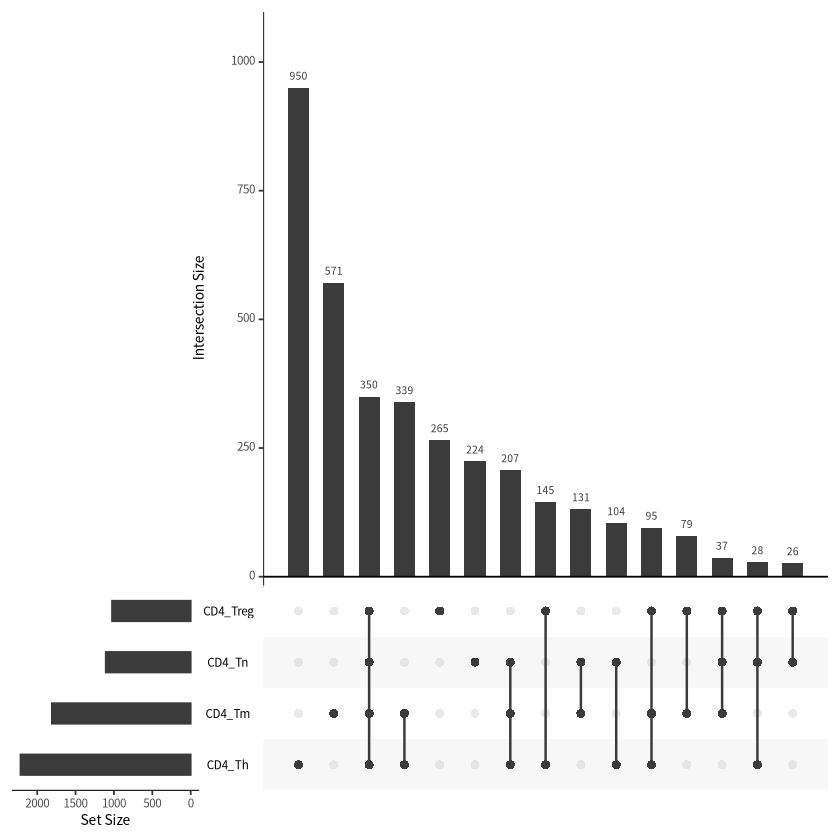

In [16]:
upset(mat, nsets = ncol(mat), order.by = "freq")

#### eGene差异

In [157]:
bulk_snp <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_perm_qvalues_0.05.csv"))
bulk_snp <- subset(bulk_snp, bulk_snp$celltype %in% c("CD4_Naive_T-CCR7", "CD4_Naive_T-SOX4", "CD4_Tcm-GPR183", "CD4_Tcm-SOX4", "CD4_Tcm-CXCR5", 
                                                      "CD4_Tcm-IFIT3", "CD4_Tem-CCR7neg", "CD4_Tfh_like-CXCR5", "CD4_Th-TNFRSF11A", "CD4_Th1-GZMK",
                                                      "CD4_Th17-RORC", "CD4_Th22-CCR10", "CD4_Treg-FCRL3", "CD4_Treg-FOXP3"))
bulk_snp$celltype_L1 <- bulk_snp$celltype
celltype_map <- c(
    "CD4_Naive_T-CCR7" = "CD4_Tn",
    "CD4_Naive_T-SOX4" = "CD4_Tn",
    "CD4_Tcm-GPR183" = "CD4_Tm",
    "CD4_Tcm-SOX4" = "CD4_Tm",
    "CD4_Tcm-CXCR5" = "CD4_Tm",
    "CD4_Tcm-IFIT3" = "CD4_Tm",
    "CD4_Tem-CCR7neg" = "CD4_Tm",
    "CD4_Tfh_like-CXCR5" = "CD4_Th",
    "CD4_Th-TNFRSF11A" = "CD4_Th",
    "CD4_Th1-GZMK" = "CD4_Th",
    "CD4_Th17-RORC" = "CD4_Th",
    "CD4_Th22-CCR10" = "CD4_Th",
    "CD4_Treg-FCRL3" = "CD4_Treg",
    "CD4_Treg-FOXP3" = "CD4_Treg"
)
bulk_snp <- bulk_snp %>%
  mutate(celltype_L1 = recode(celltype_L1, !!!celltype_map))
bulk_snp

X      X.1    phenotype_id num_var beta_shape1 beta_shape2 true_df  
1376 27596  27595  B3GALT6      2786    1.0468292   248.24582   104.83215
1377 27615  27614  SLC35E2B     3242    1.0527414   290.35800   103.66370
1378 27617  27616  SLC35E2A     3239    1.0544473   315.44470   105.35566
1379 27620  27619  PRKCZ        3738    1.0708457   343.31342   104.68570
1380 27626  27625  PLCH2        3710    1.0555120   396.26550   106.62128
1381 27639  27638  C1orf174     4951    1.0419375   502.73514   108.05032
1382 27646  27645  NOL9         3228    1.0609306   281.68744   104.14281
1383 27655  27654  UTS2         2803    0.9928095   204.05151   102.20469
1384 27683  27682  FBXO2        3067    1.0417035   290.26947   105.27587
1385 27689  27688  MTHFR        3177    1.0418891   273.43106   105.93159
1386 27716  27715  PADI4        3861    1.0012211   377.94580   105.32560
1387 27718  27717  IFFO2        4031    1.0621821   426.75836   106.23554
1388 27721  27720  EMC1         3798    1.0524611   416.89532   107.54836
1389 27727  27726  NBL1         3807    1.0129911   303.59020   103.52269
1390 27733  27732  PINK1-AS     3126    1.0659410   259.61798   105.60168
1391 27738  27737  NBPF3        3376    1.0419788   225.87451   104.19235
1392 27746  27745  ZNF436       2948    1.0075427   169.92844   103.32048
1393 27762  27761  RCAN3AS      2983    1.0643659   211.54445   104.99577
1394 27772  27771  LDLRAP1      2653    1.0376632   177.57536   105.35596
1395 27778  27777  PAFAH2       2064    1.0476130   138.69762   105.08738
1396 27807  27806  THEMIS2      1709    1.0165584    86.88126   103.74514
1397 27808  27807  RPA2         1736    1.0351503    80.89150   101.16507
1398 27885  27884  INPP5B       2463    1.0428685   224.61325   104.87612
1399 27887  27886  FHL3         2444    1.0185543   222.54204   105.80935
1400 27912  27911  HIVEP3       4065    1.0780721   189.36597   101.87700
1401 27938  27937  ARMH1        2604    1.0624444   108.90432   100.84807
1402 27967  27966  BEND5        2080    1.0166583    89.47003    99.78477
1403 27996  27995  CYB5RL       3436    1.0505005   290.41520   104.73635
1404 28016  28015  ITGB3BP      3144    1.0429002   177.77803   104.54774
1405 28034  28033  LRRIQ3       2391    0.9978051    78.65427   101.97047
⋮    ⋮      ⋮      ⋮            ⋮       ⋮           ⋮           ⋮        
4438 142886 142885 ERN1         1365    1.0210353    93.99560   106.49586
4439 142951 142950 MXRA7        3786    1.0384403   344.11343   103.54360
4440 143018 143017 TBCD         2022    1.0540667   124.60077   102.34796
4441 143077 143076 TPGS2        2772    1.0691396   170.71544   102.14906
4442 143080 143079 SLC14A1      3315    1.0264685   251.65968   106.63791
4443 143104 143103 NEDD4L       4315    1.0644631   326.08386   104.58613
4444 143120 143119 CYB5A        4024    1.0546597   456.64832   107.86241
4445 143156 143155 CIRBP        4206    1.0456051   687.10820   109.57238
4446 143248 143247 EVI5L        4446    0.9872637   394.56622   102.59534
4447 143264 143263 ZNF266       3159    1.0098268   294.89243   107.31956
4448 143361 143360 KLF2         3719    1.0376163   228.53096   104.94026
4449 143398 143397 UBA52        2866    1.0516732   256.74768   105.95205
4450 143527 143526 ZNF780A      3398    1.0541695   213.08170   104.27882
4451 143613 143612 CARD8-AS1    3454    1.0350869   308.92078   106.23779
4452 143827 143826 CPNE1        1643    1.0231081    63.57128   103.30122
4453 143938 143937 PPDPF        2892    1.0460036   252.24544   106.30713
4454 143980 143979 IFNAR2       2473    1.0325251   186.94304   105.75343
4455 144019 144018 PDXK         3194    1.0583185   224.79126   103.17117
4456 144035 144034 YBEY         2399    1.0137811   157.83072   105.30802
4457 144108 144107 XBP1         2055    1.0223410    98.65768    98.75078
4458 144129 144128 PIK3IP1      2269    1.0473434   115.94727    99.87083
4459 144164 144163 LGALS1       3079    1.0312884   272.63654   107.44293
4460 1441

In [158]:
length(unique(bulk_snp$phenotype_id))

[1] 1082

In [159]:
library(dplyr)
library(VennDiagram)

### ALL cells
bulk_genes <- unique(bulk_snp$phenotype_id)
lead_genes <- unique(lead_snp$gene)

shared_genes <- intersect(bulk_genes, lead_genes)

venn.plot <- venn.diagram(
  x = list(Bulk = bulk_genes, Lead = lead_genes),
  filename = NULL,
  fill = c("#CFC3D9", "#B4CDE0"),
  alpha = 0.5,
  cex = 1.5,
  cat.cex = 1.5,
  cat.pos = 0,
  cat.dist = 0.05,
  margin = 0.05
)

载入需要的程序包：grid

载入需要的程序包：futile.logger


载入程序包：‘VennDiagram’


The following object is masked from ‘package:ggpubr’:

    rotate




pdf 
  2

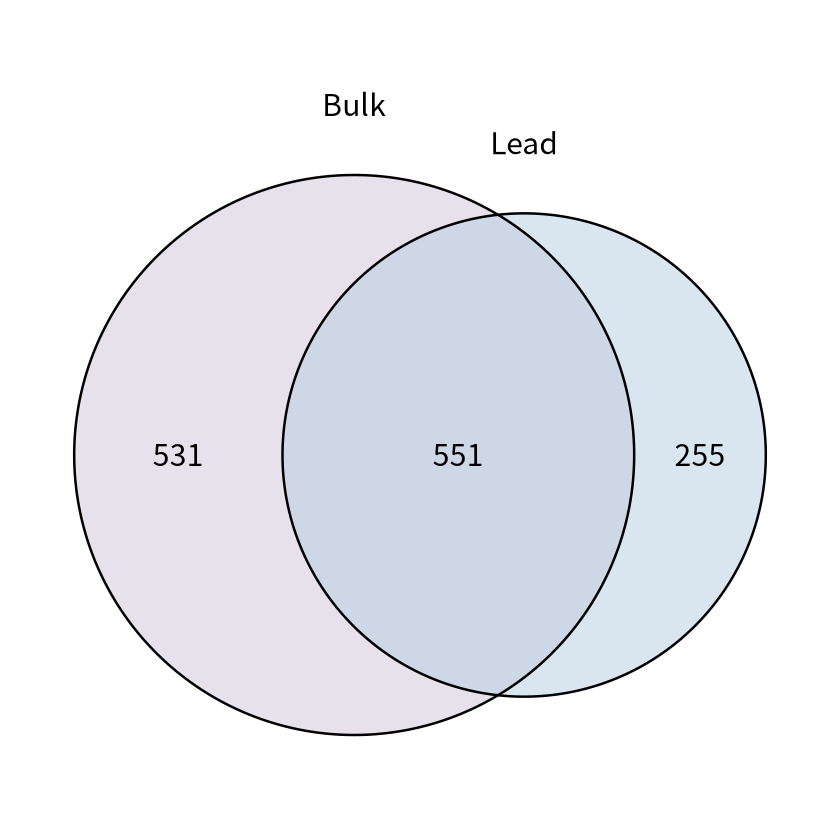

In [160]:
grid::grid.newpage()
grid::grid.draw(venn.plot)
pdf("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/figures/CD4_T_bulk_lead_egene_venn.pdf", width = 6, height = 6)
grid::grid.draw(venn.plot)
dev.off()

In [29]:
#分细胞类型
celltypes <- intersect(unique(bulk_snp$celltype_L1), unique(lead_snp$celltype_L1))
outdir <- "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/figures/"

for(ct in celltypes){
  bulk_genes <- unique(bulk_snp$phenotype_id[bulk_snp$celltype_L1 == ct])
  lead_genes <- unique(lead_snp$gene[lead_snp$celltype_L1 == ct])

  shared_genes <- intersect(bulk_genes, lead_genes)

  venn.plot <- venn.diagram(
    x = list(Bulk = bulk_genes, Lead = lead_genes),
    filename = NULL,
    fill = c("#F0E3C7", "#B4CDE0"),
    alpha = 0.5,
    cex = 1.5,
    cat.cex = 1.5,
    cat.pos = 0,
    cat.dist = 0.05,
    margin = 0.05
  )
  pdf(file.path(outdir, paste0(ct, "_bulk_lead_egene_venn.pdf")), width = 6, height = 6)
  grid.newpage()
  grid.draw(venn.plot)
  dev.off()
}

#### π1 统计量，用于量化细胞类型之间 eQTL 共享的程度 & 共享顺式 eQTL 的遗传效应相关性

##### 总细胞类型

In [3]:
input_dir <- "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_merge/"
files <- list.files(path = input_dir, pattern = "_step2_output.csv$", full.names = TRUE)
scsnp <- rbindlist(lapply(files, fread), fill = TRUE)
scsnp

CHR POS      MarkerID          Allele1 Allele2 AC_Allele2 AF_Allele2
1         15  66284705 15_66284705_T_[C] T       C        38        0.133803  
2         15  66287428 15_66287428_A_[C] A       C        41        0.144366  
3         15  66287947 15_66287947_T_[C] T       C       139        0.489437  
4         15  66289960 15_66289960_G_[T] G       T        41        0.144366  
5         15  66291095 15_66291095_T_[C] T       C        41        0.144366  
6         15  66293569 15_66293569_C_[A] C       A        50        0.176056  
7         15  66294849 15_66294849_C_[A] C       A       118        0.415493  
8         15  66295243 15_66295243_G_[A] G       A        42        0.147887  
9         15  66295811 15_66295811_C_[A] C       A       110        0.387324  
10        15  66296214 15_66296214_C_[A] C       A        96        0.338028  
11        15  66296373 15_66296373_A_[G] A       G        96        0.338028  
12        15  66298163 15_66298163_A_[C] A       C       102        0.359155  
13        15  66301130 15_66301130_A_[C] A       C        42        0.147887  
14        15  66302169 15_66302169_C_[T] C       T       102        0.359155  
15        15  66302753 15_66302753_G_[A] G       A       102        0.359155  
16        15  66303866 15_66303866_T_[C] T       C        29        0.102113  
17        15  66304850 15_66304850_G_[A] G       A       102        0.359155  
18        15  66307758 15_66307758_G_[A] G       A        42        0.147887  
19        15  66307759 15_66307759_C_[A] C       A        42        0.147887  
20        15  66308079 15_66308079_G_[A] G       A        42        0.147887  
21        15  66308916 15_66308916_G_[T] G       T        29        0.102113  
22        15  66311694 15_66311694_C_[T] C       T       102        0.359155  
23        15  66312971 15_66312971_T_[A] T       A       102        0.359155  
24        15  66316393 15_66316393_A_[G] A       G        45        0.158451  
25        15  66316848 15_66316848_G_[A] G       A       102        0.359155  
26        15  66316894 15_66316894_G_[A] G       A       101        0.355634  
27        15  66317844 15_66317844_A_[G] A       G        98        0.345070  
28        15  66319741 15_66319741_C_[G] C       G        45        0.158451  
29        15  66320480 15_66320480_A_[C] A       C       102        0.359155  
30        15  66320627 15_66320627_T_[C] T       C        45        0.158451  
⋮         ⋮   ⋮        ⋮                 ⋮       ⋮       ⋮          ⋮         
236711595 17  4982687  17_4982687_G_[A]  G       A       121        0.426056  
236711596 17  4982742  17_4982742_A_[G]  A       G       139        0.489437  
236711597 17  4983477  17_4983477_A_[G]  A       G       135        0.475352  
236711598 17  4984995  17_4984995_C_[A]  C       A        55        0.193662  
236711599 17  4985027  17_4985027_C_[A]  C       A       116        0.408451  
236711600 17  4985135  17_4985135_A_[G]  A       G       140        0.492958  
236711601 17  4986484  17_4986484_G_[A]  G       A        55        0.193662  
236711602 17  4986521  17_4986521_G_[T]  G       T        43        0.151408  
236711603 17  4987507  17_4987507_T_[C]  T       C        55        0.193662  
236711604 17  4987548  17_4987548_T_[C]  T       C       115        0.404930  
236711605 17  4987637  17_4987637_C_[A]  C       A        54        0.190141  
236711606 17  4988661  17_4988661_G_[A]  G       A        43        0.151408  
236711607 17  4989308  17_4989308_A_[G]  A       G        55        0.193662  
236711608 17  4990062  17_4990062_G_[C]  G       C        63        0.221831  
236711609 17  4990830  17_4990830_T_[C]  T       C       119        0.419014  
236711610 17  4990838  17_4990838_G_[A]  G       A        43        0.151408  
236711611 17  4991547  17_4991547_A_[G]  A       G        76        0.267606  
236711612 17  4992750  17_4992750_C_[T]  C       T        43        0.151408  
236711613 17  4993171  17_4993171_C_[T]  C       T        43

In [4]:
bulksnp <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_perm_qvalues_0.05.csv"))
bulksnp <- bulksnp %>% rename(gene = phenotype_id, MarkerID = variant_id)
bulksnp

X      X.1    gene      num_var beta_shape1 beta_shape2 true_df 
1      10      9    B3GALT6   2786    1.053914    226.40132   102.8248
2      16     15    CPTP      2941    1.067367    255.58499   103.8560
3      30     29    SLC35E2B  3242    1.057687    297.02002   103.7269
4      32     31    SLC35E2A  3239    1.047195    300.03436   104.5517
5      43     42    PLCH2     3710    1.037312    392.35364   107.1216
6      57     56    C1orf174  4951    1.011741    501.99033   108.7314
7      65     64    NOL9      3228    1.039611    299.38970   105.9930
8      74     73    UTS2      2803    1.070726    221.09955   102.3855
9     103    102    FBXO2     3067    1.067395    284.92276   105.0333
10    109    108    MTHFR     3177    1.034920    277.53220   106.3075
11    137    136    CROCC     3731    1.080601    326.90110   104.9232
12    140    139    PADI4     3861    1.036987    426.88287   107.6927
13    146    145    EMC1      3798    1.062854    383.67947   106.1662
14    152    151    NBL1      3807    1.040517    307.92004   103.9622
15    158    157    PINK1-AS  3126    1.046500    241.90760   104.3648
16    163    162    NBPF3     3376    1.031207    225.47308   104.1711
17    166    165    CDC42-AS1 3397    1.036467    194.54184    98.1704
18    167    166    CDC42     3417    1.072947    240.37250   102.7780
19    176    175    MDS2      3175    1.024926    182.04480   103.9850
20    190    189    RCAN3AS   2983    1.041578    201.76399   104.6483
21    200    199    LDLRAP1   2653    1.025973    184.35033   106.5614
22    234    233    STX12     1610    1.051211     80.68401   102.2667
23    236    235    THEMIS2   1709    1.030054     87.43906   104.0759
24    237    236    RPA2      1736    1.037042     85.73297   102.8431
25    283    282    AK2       2470    1.057732    152.76984   104.0316
26    320    319    INPP5B    2463    1.054503    224.36751   104.8769
27    330    329    HPCAL4    3079    1.060859    164.14740   101.9138
28    331    330    PPIE      3142    1.049796    164.09040   101.6213
29    421    420    CC2D1B    2100    1.044589    102.16039   102.8629
30    461    460    ITGB3BP   3144    1.050676    178.37212   104.1100
⋮     ⋮      ⋮      ⋮         ⋮       ⋮           ⋮           ⋮       
11731 383219 383218 CHKB-DT   2237    1.0207465   154.96070   99.43791
11732 383309 383308 FUCA1     2949    0.9880982   155.95276   84.84940
11733 383322 383321 CD52      1701    1.0269600    96.52242   83.66239
11734 383718 383717 CD55      2455    1.0451459   205.85090   86.37991
11735 384688 384687 ERAP2     3362    1.0368938   103.49921   82.58463
11736 384884 384883 BTN3A2    2857    1.0383685    90.75875   79.21925
11737 385013 385012 SNHG5     3738    1.0445969    77.13940   79.53039
11738 385046 385045 CALHM6    2795    1.0467345    86.75944   80.35055
11739 385270 385269 CUX1      2978    1.0419344   208.25984   84.99684
11740 385337 385336 TMEM176B  4381    1.0113904   336.26532   84.86465
11741 385761 385760 RASSF4    3195    1.0513175   134.50282   82.21353
11742 385806 385805 ADK       2921    1.0211577    94.53586   82.14523
11743 385823 385822 LIPA      3339    1.0442538   175.47560   84.21652
11744 385880 385879 SHTN1     3784    1.0153061   341.71870   86.14157
11745 385936 385935 LSP1      2492    1.0254927   289.42526   87.17243
11746 386112 386111 RIN1      2172    1.0038495    67.55766   77.65004
11747 386154 386153 UCP2      1964    1.0243206   103.68524   85.25331
11748 386212 386211 SIDT2     4078    1.0621905   371.09662   84.85799
11749 386213 386212 TAGLN     4093    1.0339255   333.01030   83.49871
11750 386277 386276 CLEC12A   3571    1.0539762   200.86880   83.19815
11751 386417 386416 LYZ       2984    1.0474737   191.98720   84.13439
11752 386829 386828 IGHA1     1177    0.9877429    79.88494   83.64935
11753 386842 386841 NOP10     4123    1.0562593   303.99356   84.97689
11754 387091 387090 SULT1A1   2384    1.0537101   166.48323   82.70532
11755 387341 387340 LGALS9    

In [5]:
library(qvalue)
common <- merge(
    scsnp[, c("gene", "MarkerID", "p.value",'BETA','SE')],
    bulksnp[, c("gene", "MarkerID", "pval_nominal",'slope','slope_se')],
    by = c("gene", "MarkerID")
  )
common

gene    MarkerID          p.value     BETA        SE        pval_nominal
1      A1BG    19_58330182_C_[T] 0.002983970 0.2165870   0.0728804 1.470903e-06
2      A1BG    19_58330182_C_[T] 0.002983970 0.2165870   0.0728804 3.171822e-06
3      A1BG    19_58330182_C_[T] 0.035257700 0.1213960   0.0576579 1.470903e-06
4      A1BG    19_58330182_C_[T] 0.035257700 0.1213960   0.0576579 3.171822e-06
5      A1BG    19_58330182_C_[T] 0.000816014 0.1812120   0.0541100 1.470903e-06
6      A1BG    19_58330182_C_[T] 0.000816014 0.1812120   0.0541100 3.171822e-06
7      A1BG    19_58330182_C_[T] 0.070370500 0.1129090   0.0623970 1.470903e-06
8      A1BG    19_58330182_C_[T] 0.070370500 0.1129090   0.0623970 3.171822e-06
9      A1BG    19_58330182_C_[T] 0.000638016 0.1514030   0.0443234 1.470903e-06
10     A1BG    19_58330182_C_[T] 0.000638016 0.1514030   0.0443234 3.171822e-06
11     A1BG    19_58330182_C_[T] 0.000832786 0.1508800   0.0451395 1.470903e-06
12     A1BG    19_58330182_C_[T] 0.000832786 0.1508800   0.0451395 3.171822e-06
13     A1BG    19_58330182_C_[T] 0.000507029 0.1668250   0.0479485 1.470903e-06
14     A1BG    19_58330182_C_[T] 0.000507029 0.1668250   0.0479485 3.171822e-06
15     AASDH   4_56341022_A_[G]  0.023800400 0.0747735   0.0330811 2.174797e-06
16     AASDH   4_56341022_A_[G]  0.045698500 0.0637788   0.0319186 2.174797e-06
17     AASDH   4_56341022_A_[G]  0.079517100 0.1310940   0.0747614 2.174797e-06
18     AASDH   4_56341022_A_[G]  0.076212500 0.0915847   0.0516523 2.174797e-06
19     AASDH   4_56341022_A_[G]  0.160442000 0.0610094   0.0434668 2.174797e-06
20     AASDH   4_56341022_A_[G]  0.095845800 0.0814579   0.0489138 2.174797e-06
21     AASDH   4_56341022_A_[G]  0.059420200 0.1138150   0.0603768 2.174797e-06
22     AASDH   4_56341022_A_[G]  0.165781000 0.0621285   0.0448294 2.174797e-06
23     ABCA2   9_136532614_T_[C] 0.321928000 0.0886620   0.0895121 1.940414e-06
24     ABCA2   9_136532614_T_[C] 0.213625000 0.0662153   0.0532423 1.940414e-06
25     ABCA2   9_136532614_T_[C] 0.118863000 0.0911122   0.0584216 1.940414e-06
26     ABCA2   9_136532614_T_[C] 0.131276000 0.0723372   0.0479343 1.940414e-06
27     ABCA2   9_136532614_T_[C] 0.019481700 0.1159950   0.0496498 1.940414e-06
28     ABCA2   9_136532614_T_[C] 0.235266000 0.0567052   0.0477758 1.940414e-06
29     ABCA2   9_136532614_T_[C] 0.450243000 0.0439020   0.0581476 1.940414e-06
30     ABCC5   3_183917980_C_[T] 0.001060050 0.0881750   0.0269304 4.268705e-07
⋮      ⋮       ⋮                 ⋮           ⋮           ⋮         ⋮           
100746 ZSCAN25 7_99297408_G_[A]  0.895216000 -0.00646141 0.0490592 4.195855e-07
100747 ZSCAN25 7_99297408_G_[A]  0.213244000  0.05461660 0.0438796 4.195855e-07
100748 ZSCAN25 7_99662739_C_[A]  0.034510300  0.12058000 0.0570336 7.855577e-06
100749 ZSCAN25 7_99662739_C_[A]  0.003939120  0.14920700 0.0517416 7.855577e-06
100750 ZSCAN25 7_99662739_C_[A]  0.010553700  0.14192400 0.0554907 7.855577e-06
100751 ZSCAN25 7_99662739_C_[A]  0.107462000  0.07991740 0.0496472 7.855577e-06
100752 ZSCAN25 7_99662739_C_[A]  0.043932500  0.09323960 0.0462778 7.855577e-06
100753 ZSCAN25 7_99699388_A_[G]  0.034982500  0.11833600 0.0561180 2.880496e-07
100754 ZSCAN25 7_99699388_A_[G]  0.000046401  0.20368700 0.0499718 2.880496e-07
100755 ZSCAN25 7_99699388_A_[G]  0.002330060  0.16335300 0.0536346 2.880496e-07
100756 ZSCAN25 7_99699388_A_[G]  0.246830000  0.05534710 0.0477919 2.880496e-07
100757 ZSCAN25 7_99699388_A_[G]  0.006775610  0.11993600 0.0442865 2.880496e-07
100758 ZSCAN29 15_43863561_A_[T] 0.714224000 -0.01635290 0.0446570 2.261822e-05
100759 ZSCAN29 15_43863561_A_[T] 0.660326000  0.02418610 0.0550355 2.261822e-05
100760 ZSCAN29 15_43863561_A_[T] 0.034058000 -0.11429200 0.0539239 2.261822e-05
100761 ZSCAN29 15_43863561_A_[T] 0.471116000 -0.03458420 0.0479894 2.261822e-05
100762 ZSCAN29 15_43863561_A_[T] 0.612449000 -0.02677360 0.0528516 2.261822e-05
100763 ZSWIM7  17_16042294_C_[T] 0.015236100 -0.05058940 0.0208469 7.481729e-07
100764 

In [12]:
common_min <- common %>%
  group_by(gene, MarkerID) %>%
  slice_min(order_by = p.value, n = 1, with_ties = FALSE) %>%
  ungroup()
common_min

gene    MarkerID           p.value     BETA       SE        pval_nominal
1    A1BG    19_58330182_C_[T]  5.07029e-04  0.1668250 0.0479485 1.470903e-06
2    AASDH   4_56341022_A_[G]   2.38004e-02  0.0747735 0.0330811 2.174797e-06
3    ABCA2   9_136532614_T_[C]  1.94817e-02  0.1159950 0.0496498 1.940414e-06
4    ABCC5   3_183917980_C_[T]  2.30028e-04  0.1687600 0.0457925 4.268705e-07
5    ABCC5   3_183919448_C_[T]  4.25030e-03 -0.1061920 0.0371411 2.024530e-06
6    ABCC5   3_183929293_T_[C]  3.81731e-04  0.1646380 0.0463244 4.050216e-08
7    ABHD10  3_112378523_T_[C]  4.67041e-02  0.0892656 0.0448802 1.166053e-06
8    ABHD18  4_127910153_T_[G]  1.43022e-02 -0.0963412 0.0393262 2.120499e-06
9    ABI3    17_49451030_G_[A]  9.92525e-04  0.2921900 0.0885824 1.849944e-06
10   ABL2    1_179254807_A_[G]  6.69283e-04  0.1651730 0.0485381 4.293192e-07
11   ABRACL  6_139017480_T_[C]  1.03722e-04  0.1106810 0.0285111 3.497193e-10
12   ABRACL  6_139029062_C_[T]  9.69008e-05 -0.0991866 0.0254432 2.925284e-06
13   ABT1    6_25646568_C_[T]   6.64504e-03 -0.0823341 0.0303338 4.594405e-06
14   ACAD9   3_128845547_G_[A]  3.79714e-08  0.4749900 0.0863268 4.285295e-08
15   ACAD9   3_129228874_C_[T]  3.70285e-06  0.4464070 0.0964255 3.117146e-06
16   ACADSB  10_122113611_G_[A] 1.19615e-01 -0.0660878 0.0424622 4.122520e-06
17   ACBD3   1_226143951_C_[T]  3.77949e-06 -0.1641800 0.0354977 3.293191e-06
18   ACBD3   1_226164797_T_[G]  3.03364e-07 -0.1771350 0.0345730 4.464110e-06
19   ACCS    11_44064137_C_[A]  5.87732e-19  0.6632500 0.0743838 1.350643e-32
20   ACCS    11_44067802_G_[A]  1.82252e-17  0.6209920 0.0728579 8.982332e-14
21   ACCS    11_44086670_G_[T]  1.11288e-13  0.5423640 0.0729283 2.019935e-09
22   ACCS    11_44260303_C_[T]  1.54910e-12  0.5437230 0.0768195 1.624057e-10
23   ACP5    19_11573597_C_[T]  1.50342e-08  0.2629640 0.0463340 6.866547e-07
24   ACP5    19_11579861_T_[C]  4.75823e-10  0.3102490 0.0497131 8.143160e-16
25   ACP5    19_11591944_T_[C]  1.21231e-06  0.1537090 0.0316631 9.707404e-14
26   ACP5    19_11601693_A_[C]  9.88362e-10  0.3078770 0.0502706 2.124521e-07
27   ACP6    1_147625834_T_[C]  1.03547e-02  0.1360700 0.0530616 4.757945e-08
28   ACP6    1_147627887_C_[G]  8.31166e-02  0.0720882 0.0416002 1.038206e-06
29   ACP6    1_147633018_A_[G]  3.36029e-03  0.1482260 0.0505237 1.951082e-06
30   ACSF3   16_89131274_G_[C]  7.02398e-04 -0.2266450 0.0668007 2.391485e-09
⋮    ⋮       ⋮                  ⋮           ⋮          ⋮         ⋮           
4857 ZNF880  19_52366799_C_[G]  5.45936e-06  0.2805610 0.0615923 4.314730e-08
4858 ZNF880  19_52377012_C_[T]  2.18759e-05  0.2605560 0.0612937 1.617875e-07
4859 ZNF880  19_52379267_T_[C]  3.20085e-05  0.2571610 0.0617592 5.566558e-12
4860 ZNF880  19_52382606_C_[T]  1.80342e-05  0.2649250 0.0616953 1.159546e-08
4861 ZNF880  19_52390220_A_[G]  2.42711e-05  0.2614490 0.0618490 2.094529e-07
4862 ZNF880  19_52392776_G_[C]  4.14382e-05  0.2548230 0.0620875 1.631939e-06
4863 ZNF91   19_23304448_C_[A]  3.01554e-04  0.1448940 0.0400786 3.530265e-06
4864 ZNF91   19_23428092_T_[A]  8.66579e-03  0.0928848 0.0353835 7.453313e-09
4865 ZNF91   19_23437400_T_[G]  8.41502e-04  0.1395000 0.0417716 7.294496e-07
4866 ZNF91   19_23755759_C_[T]  5.06380e-04  0.1427370 0.0410415 9.352159e-08
4867 ZNF91   19_23898542_G_[T]  4.18641e-04  0.1355680 0.0384231 8.743451e-07
4868 ZNHIT6  1_85645617_C_[T]   3.93524e-03 -0.1519320 0.0526795 1.510984e-06
4869 ZNRF2   7_29645530_G_[T]   9.23705e-02 -0.1043660 0.0620109 5.655641e-06
4870 ZPR1    11_116593270_G_[T] 2.33258e-05  0.1150030 0.0271675 2.547434e-06
4871 ZRANB2  1_70415569_C_[T]   7.30012e-03  0.0865216 0.0322486 9.429042e-06
4872 ZSCAN18 19_58085558_A_[G]  1.86809e-08 -0.3122690 0.0554429 9.507432e-08
4873 ZSCAN18 19_58098310_G_[C]  1.48306e-09 -0.3262670 0.0538751 4.855861e-14
4874 ZSCAN18 19_58099744_A_[G]  4.32204e-09  0.2610530 0.0444372 7.752189e-13
4875 ZSCAN18 19_58101139_C_[T]  3.49677e-09 -0.3220610 0.0544542 6.095427e-10
4876 ZSCAN18 19_58107369_C_

In [13]:
pvals <- common_min$p.value
  
# π₁ 估计
qobj <- qvalue_truncp(pvals)
pi1 <- 1 - qobj$pi0
pi1

[1] 0.9883573

In [14]:
corr <- cor(common_min$BETA, common_min$slope, method = "pearson")
corr

[1] 0.8175708

In [15]:
common_min$zscore1 <- common_min$BETA/common_min$SE
common_min$zscore2 <- common_min$slope/common_min$slope_se

In [16]:
corr <- cor(common_min$zscore1, common_min$zscore2, method = "pearson")
corr

[1] 0.8771773

In [18]:
test <- cor.test(common_min$zscore1, common_min$zscore2, method = "pearson")
cor = test$estimate
pval = test$p.value
cor
pval

cor 
0.8771773

[1] 0

In [20]:
p <- ggplot(common_min, aes(x = zscore1, y = zscore2)) +
     geom_point(alpha = 0.3) +
     geom_smooth(method = "lm", color = "red") +
     labs(title = paste0("Correlation = ", round(corr, 3)),
          sx = "sc-eQTL beta", y = "bulk-eQTL beta") + mytheme
ggsave('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/figures/cor_cd4_scqtl_vs_bulkqtl.pdf',p)

Saving 7 x 7 in image
`geom_smooth()` using formula = 'y ~ x'


##### 分细胞类型

In [21]:
scsnp$celltype_L1 <- scsnp$celltype
celltype_map <- c(
    "CD4_Naive_T-CCR7" = "CD4_Tn",
    "CD4_Naive_T-SOX4" = "CD4_Tn",
    "CD4_Tcm-GPR183" = "CD4_Tm",
    "CD4_Tcm-SOX4" = "CD4_Tm",
    "CD4_Tcm-CXCR5" = "CD4_Tm",
    "CD4_Tcm-IFIT3" = "CD4_Tm",
    "CD4_Tem-CCR7neg" = "CD4_Tm",
    "CD4_Tfh_like-CXCR5" = "CD4_Th",
    "CD4_Th-TNFRSF11A" = "CD4_Th",
    "CD4_Th1-GZMK" = "CD4_Th",
    "CD4_Th17-RORC" = "CD4_Th",
    "CD4_Th22-CCR10" = "CD4_Th",
    "CD4_Treg-FCRL3" = "CD4_Treg",
    "CD4_Treg-FOXP3" = "CD4_Treg"
)
scsnp <- scsnp %>%
  mutate(celltype_L1 = recode(celltype_L1, !!!celltype_map))
scsnp

CHR POS      MarkerID          Allele1 Allele2 AC_Allele2 AF_Allele2
1         15  66284705 15_66284705_T_[C] T       C        38        0.133803  
2         15  66287428 15_66287428_A_[C] A       C        41        0.144366  
3         15  66287947 15_66287947_T_[C] T       C       139        0.489437  
4         15  66289960 15_66289960_G_[T] G       T        41        0.144366  
5         15  66291095 15_66291095_T_[C] T       C        41        0.144366  
6         15  66293569 15_66293569_C_[A] C       A        50        0.176056  
7         15  66294849 15_66294849_C_[A] C       A       118        0.415493  
8         15  66295243 15_66295243_G_[A] G       A        42        0.147887  
9         15  66295811 15_66295811_C_[A] C       A       110        0.387324  
10        15  66296214 15_66296214_C_[A] C       A        96        0.338028  
11        15  66296373 15_66296373_A_[G] A       G        96        0.338028  
12        15  66298163 15_66298163_A_[C] A       C       102        0.359155  
13        15  66301130 15_66301130_A_[C] A       C        42        0.147887  
14        15  66302169 15_66302169_C_[T] C       T       102        0.359155  
15        15  66302753 15_66302753_G_[A] G       A       102        0.359155  
16        15  66303866 15_66303866_T_[C] T       C        29        0.102113  
17        15  66304850 15_66304850_G_[A] G       A       102        0.359155  
18        15  66307758 15_66307758_G_[A] G       A        42        0.147887  
19        15  66307759 15_66307759_C_[A] C       A        42        0.147887  
20        15  66308079 15_66308079_G_[A] G       A        42        0.147887  
21        15  66308916 15_66308916_G_[T] G       T        29        0.102113  
22        15  66311694 15_66311694_C_[T] C       T       102        0.359155  
23        15  66312971 15_66312971_T_[A] T       A       102        0.359155  
24        15  66316393 15_66316393_A_[G] A       G        45        0.158451  
25        15  66316848 15_66316848_G_[A] G       A       102        0.359155  
26        15  66316894 15_66316894_G_[A] G       A       101        0.355634  
27        15  66317844 15_66317844_A_[G] A       G        98        0.345070  
28        15  66319741 15_66319741_C_[G] C       G        45        0.158451  
29        15  66320480 15_66320480_A_[C] A       C       102        0.359155  
30        15  66320627 15_66320627_T_[C] T       C        45        0.158451  
⋮         ⋮   ⋮        ⋮                 ⋮       ⋮       ⋮          ⋮         
236711595 17  4982687  17_4982687_G_[A]  G       A       121        0.426056  
236711596 17  4982742  17_4982742_A_[G]  A       G       139        0.489437  
236711597 17  4983477  17_4983477_A_[G]  A       G       135        0.475352  
236711598 17  4984995  17_4984995_C_[A]  C       A        55        0.193662  
236711599 17  4985027  17_4985027_C_[A]  C       A       116        0.408451  
236711600 17  4985135  17_4985135_A_[G]  A       G       140        0.492958  
236711601 17  4986484  17_4986484_G_[A]  G       A        55        0.193662  
236711602 17  4986521  17_4986521_G_[T]  G       T        43        0.151408  
236711603 17  4987507  17_4987507_T_[C]  T       C        55        0.193662  
236711604 17  4987548  17_4987548_T_[C]  T       C       115        0.404930  
236711605 17  4987637  17_4987637_C_[A]  C       A        54        0.190141  
236711606 17  4988661  17_4988661_G_[A]  G       A        43        0.151408  
236711607 17  4989308  17_4989308_A_[G]  A       G        55        0.193662  
236711608 17  4990062  17_4990062_G_[C]  G       C        63        0.221831  
236711609 17  4990830  17_4990830_T_[C]  T       C       119        0.419014  
236711610 17  4990838  17_4990838_G_[A]  G       A        43        0.151408  
236711611 17  4991547  17_4991547_A_[G]  A       G        76        0.267606  
236711612 17  4992750  17_4992750_C_[T]  C       T        43        0.151408  
236711613 17  4993171  17_4993171_C_[T]  C       T        43

In [22]:
bulksnp$celltype_L1 <- bulksnp$celltype
celltype_map <- c(
    "CD4_Naive_T-CCR7" = "CD4_Tn",
    "CD4_Naive_T-SOX4" = "CD4_Tn",
    "CD4_Tcm-GPR183" = "CD4_Tm",
    "CD4_Tcm-SOX4" = "CD4_Tm",
    "CD4_Tcm-CXCR5" = "CD4_Tm",
    "CD4_Tcm-IFIT3" = "CD4_Tm",
    "CD4_Tem-CCR7neg" = "CD4_Tm",
    "CD4_Tfh_like-CXCR5" = "CD4_Th",
    "CD4_Th-TNFRSF11A" = "CD4_Th",
    "CD4_Th1-GZMK" = "CD4_Th",
    "CD4_Th17-RORC" = "CD4_Th",
    "CD4_Th22-CCR10" = "CD4_Th",
    "CD4_Treg-FCRL3" = "CD4_Treg",
    "CD4_Treg-FOXP3" = "CD4_Treg"
)
bulksnp <- bulksnp %>%
  mutate(celltype_L1 = recode(celltype_L1, !!!celltype_map))
bulksnp

X      X.1    gene      num_var beta_shape1 beta_shape2 true_df 
1      10      9    B3GALT6   2786    1.053914    226.40132   102.8248
2      16     15    CPTP      2941    1.067367    255.58499   103.8560
3      30     29    SLC35E2B  3242    1.057687    297.02002   103.7269
4      32     31    SLC35E2A  3239    1.047195    300.03436   104.5517
5      43     42    PLCH2     3710    1.037312    392.35364   107.1216
6      57     56    C1orf174  4951    1.011741    501.99033   108.7314
7      65     64    NOL9      3228    1.039611    299.38970   105.9930
8      74     73    UTS2      2803    1.070726    221.09955   102.3855
9     103    102    FBXO2     3067    1.067395    284.92276   105.0333
10    109    108    MTHFR     3177    1.034920    277.53220   106.3075
11    137    136    CROCC     3731    1.080601    326.90110   104.9232
12    140    139    PADI4     3861    1.036987    426.88287   107.6927
13    146    145    EMC1      3798    1.062854    383.67947   106.1662
14    152    151    NBL1      3807    1.040517    307.92004   103.9622
15    158    157    PINK1-AS  3126    1.046500    241.90760   104.3648
16    163    162    NBPF3     3376    1.031207    225.47308   104.1711
17    166    165    CDC42-AS1 3397    1.036467    194.54184    98.1704
18    167    166    CDC42     3417    1.072947    240.37250   102.7780
19    176    175    MDS2      3175    1.024926    182.04480   103.9850
20    190    189    RCAN3AS   2983    1.041578    201.76399   104.6483
21    200    199    LDLRAP1   2653    1.025973    184.35033   106.5614
22    234    233    STX12     1610    1.051211     80.68401   102.2667
23    236    235    THEMIS2   1709    1.030054     87.43906   104.0759
24    237    236    RPA2      1736    1.037042     85.73297   102.8431
25    283    282    AK2       2470    1.057732    152.76984   104.0316
26    320    319    INPP5B    2463    1.054503    224.36751   104.8769
27    330    329    HPCAL4    3079    1.060859    164.14740   101.9138
28    331    330    PPIE      3142    1.049796    164.09040   101.6213
29    421    420    CC2D1B    2100    1.044589    102.16039   102.8629
30    461    460    ITGB3BP   3144    1.050676    178.37212   104.1100
⋮     ⋮      ⋮      ⋮         ⋮       ⋮           ⋮           ⋮       
11731 383219 383218 CHKB-DT   2237    1.0207465   154.96070   99.43791
11732 383309 383308 FUCA1     2949    0.9880982   155.95276   84.84940
11733 383322 383321 CD52      1701    1.0269600    96.52242   83.66239
11734 383718 383717 CD55      2455    1.0451459   205.85090   86.37991
11735 384688 384687 ERAP2     3362    1.0368938   103.49921   82.58463
11736 384884 384883 BTN3A2    2857    1.0383685    90.75875   79.21925
11737 385013 385012 SNHG5     3738    1.0445969    77.13940   79.53039
11738 385046 385045 CALHM6    2795    1.0467345    86.75944   80.35055
11739 385270 385269 CUX1      2978    1.0419344   208.25984   84.99684
11740 385337 385336 TMEM176B  4381    1.0113904   336.26532   84.86465
11741 385761 385760 RASSF4    3195    1.0513175   134.50282   82.21353
11742 385806 385805 ADK       2921    1.0211577    94.53586   82.14523
11743 385823 385822 LIPA      3339    1.0442538   175.47560   84.21652
11744 385880 385879 SHTN1     3784    1.0153061   341.71870   86.14157
11745 385936 385935 LSP1      2492    1.0254927   289.42526   87.17243
11746 386112 386111 RIN1      2172    1.0038495    67.55766   77.65004
11747 386154 386153 UCP2      1964    1.0243206   103.68524   85.25331
11748 386212 386211 SIDT2     4078    1.0621905   371.09662   84.85799
11749 386213 386212 TAGLN     4093    1.0339255   333.01030   83.49871
11750 386277 386276 CLEC12A   3571    1.0539762   200.86880   83.19815
11751 386417 386416 LYZ       2984    1.0474737   191.98720   84.13439
11752 386829 386828 IGHA1     1177    0.9877429    79.88494   83.64935
11753 386842 386841 NOP10     4123    1.0562593   303.99356   84.97689
11754 387091 387090 SULT1A1   2384    1.0537101   166.48323   82.70532
11755 387341 387340 LGALS9    

In [26]:
library(qvalue)
calc_pi1_pair <- function(df1, df2, cell1, cell2){
  # 提取指定 cell type
  d1 <- df1 %>% filter(celltype_L1 == !!cell1)
  d2 <- df2 %>% filter(celltype_L1 == !!cell2)
  
  # 合并
  common <- merge(
    d1[, c("gene", "MarkerID", "p.value", "BETA")],
    d2[, c("gene", "MarkerID", "pval_nominal", "slope")],
    by = c("gene", "MarkerID")
  )
  
  # π₁ 估计（基于 sc 数据 p 值）
  pvals <- common$p.value
  qobj <- qvalue_truncp(pvals)
  pi1 <- 1 - qobj$pi0
  
  # 如果是相同细胞类型，计算相关性 & 画图
  cor_res <- NULL
  if(cell1 == cell2 && nrow(common) > 5){
      test <- cor.test(common$BETA, common$slope, method = "pearson")
      cor_res <- list(cor = test$estimate, pval = test$p.value)
    
      # 画散点图
      p <- ggplot(common, aes(x = BETA, y = slope)) +
           geom_point(alpha = 0.5) +
           geom_smooth(method = "lm", se = FALSE, color = "red") +
           theme_minimal() +
           labs(title = paste0(cell1, ": BETA vs slope"),
           subtitle = paste0("r = ", round(test$estimate, 3), ", p = ", signif(test$p.value, 3)),
           x = "scQTL BETA", y = "bulkQTL slope")
      ggsave(filename = file.path(paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/figures/cor_',cell1, "_BETA_vs_slope.pdf")),
             plot = p, width = 4, height = 4)
  }
  
  return(list(pi1 = pi1, cor = cor_res))
}

# 所有 cell type 列表
cells <- c('CD4_Tn','CD4_Tm','CD4_Th','CD4_Treg')

# 初始化矩阵
pi1_mat <- matrix(NA, nrow = length(cells), ncol = length(cells),
                  dimnames = list(cells, cells))

for(i in seq_along(cells)){
  for(j in seq_along(cells)){
    res <- calc_pi1_pair(scsnp, bulksnp, cells[i], cells[j])
    pi1_mat[i,j] <- res$pi1
  }
}

pi1_mat

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


CD4_Tn    CD4_Tm    CD4_Th    CD4_Treg 
CD4_Tn   0.9564748 0.9673755 0.9379493 0.9329391
CD4_Tm   0.9576307 0.9583960 0.9570990 0.9658093
CD4_Th   0.9441127 0.9541151 0.9660295 0.9671873
CD4_Treg 0.8973890 0.9222666 0.9334968 0.9684303

Saving 7 x 7 in image


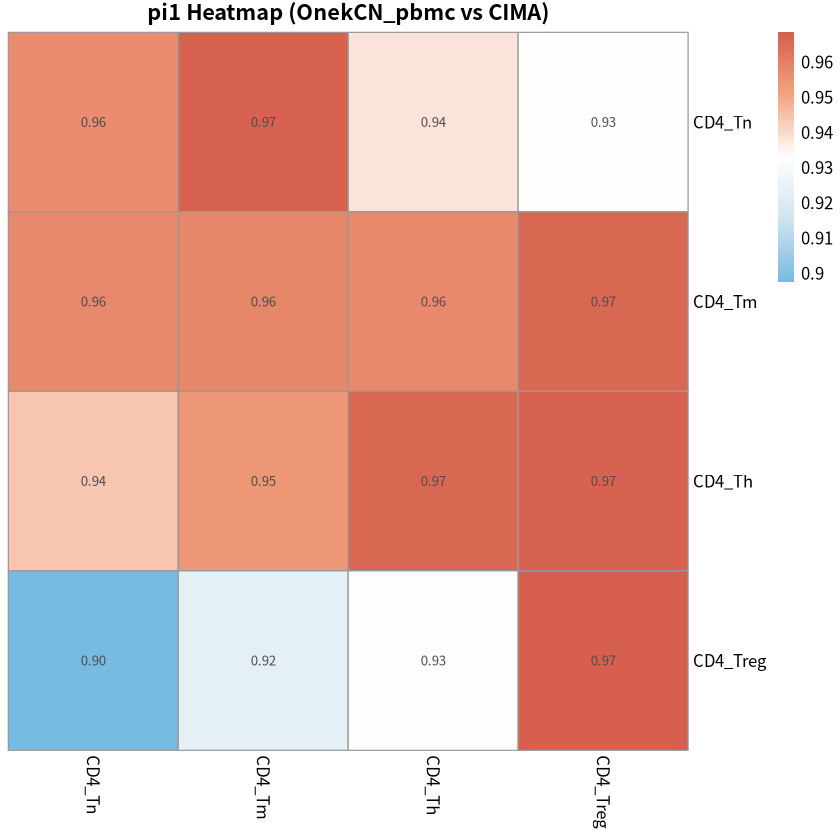

In [27]:
library(pheatmap)
p <- pheatmap(pi1_mat,
         color = colorRampPalette(c("#78BBE2","#D1E5F0","white","#F4A582","#D6604D"))(100),
         cluster_rows = FALSE,  # 不聚类，保持行列顺序
         cluster_cols = FALSE,
         display_numbers = TRUE, # 在格子中显示 π₁ 值
         number_format = "%.2f",
         main = "pi1 Heatmap (OnekCN_pbmc vs CIMA)")
ggsave('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/figures/pi1_scqtl_vs_bulkqtl.pdf',p)

### ieQTL

### ieQTL 数目统计

In [6]:
input_dir <- "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/"

In [7]:
files <- list.files(path = input_dir, pattern = "_Inflammatory_Module.csv$", full.names = TRUE)
merged_df <- lapply(files, function(f) {
    df <- read.csv(f)
    fname <- tools::file_path_sans_ext(basename(f))
    df$celltype <- sub("_Inflammatory_Module$", "", fname)  # 去掉末尾
    return(df)
}) %>% bind_rows()

In [8]:
merged_df <- subset(merged_df, lrt_pval < 0.05)
merged_df

X     gene   snp               term          Estimate_full
61      61   ABHD18 4_127663425_A_[G] (Intercept)   -2.456070398 
62      62   ABHD18 4_127663425_A_[G] age            0.000717666 
63      63   ABHD18 4_127663425_A_[G] G              0.055616014 
64      64   ABHD18 4_127663425_A_[G] G:pheno       -0.029842794 
65      65   ABHD18 4_127663425_A_[G] geno_PC1      -0.118138654 
66      66   ABHD18 4_127663425_A_[G] geno_PC2      -0.020691701 
67      67   ABHD18 4_127663425_A_[G] PC_1          -0.031757354 
68      68   ABHD18 4_127663425_A_[G] PC_2          -0.014256742 
69      69   ABHD18 4_127663425_A_[G] PC_3          -0.006681101 
70      70   ABHD18 4_127663425_A_[G] PC_4          -0.003435897 
71      71   ABHD18 4_127663425_A_[G] PC_5          -0.012573089 
72      72   ABHD18 4_127663425_A_[G] pct_counts_mt -0.018169246 
73      73   ABHD18 4_127663425_A_[G] pheno         -0.076408855 
74      74   ABHD18 4_127663425_A_[G] total_counts   0.328496215 
75      75   ABHD18 4_127663425_A_[G] treat_time     0.023293161 
226    226   ADAM10 15_58478324_C_[T] (Intercept)   -1.269397676 
227    227   ADAM10 15_58478324_C_[T] age           -0.002353388 
228    228   ADAM10 15_58478324_C_[T] G              0.257009633 
229    229   ADAM10 15_58478324_C_[T] G:pheno        0.025056553 
230    230   ADAM10 15_58478324_C_[T] geno_PC1      -0.028226215 
231    231   ADAM10 15_58478324_C_[T] geno_PC2      -0.218248488 
232    232   ADAM10 15_58478324_C_[T] PC_1          -0.041250125 
233    233   ADAM10 15_58478324_C_[T] PC_2          -0.019471212 
234    234   ADAM10 15_58478324_C_[T] PC_3          -0.026566351 
235    235   ADAM10 15_58478324_C_[T] PC_4          -0.026344385 
236    236   ADAM10 15_58478324_C_[T] PC_5           0.007401527 
237    237   ADAM10 15_58478324_C_[T] pct_counts_mt -0.022555309 
238    238   ADAM10 15_58478324_C_[T] pheno         -0.005442578 
239    239   ADAM10 15_58478324_C_[T] total_counts   0.241731604 
240    240   ADAM10 15_58478324_C_[T] treat_time     0.007355890 
⋮      ⋮     ⋮      ⋮                 ⋮             ⋮            
146641 10636 ZNF277 7_111870774_C_[T] (Intercept)   -1.733618393 
146642 10637 ZNF277 7_111870774_C_[T] age           -0.003979245 
146643 10638 ZNF277 7_111870774_C_[T] G             -0.197794608 
146644 10639 ZNF277 7_111870774_C_[T] G:pheno        0.060852943 
146645 10640 ZNF277 7_111870774_C_[T] geno_PC1      -0.059837395 
146646 10641 ZNF277 7_111870774_C_[T] geno_PC2      -0.319672011 
146647 10642 ZNF277 7_111870774_C_[T] PC_1           0.021128167 
146648 10643 ZNF277 7_111870774_C_[T] PC_2          -0.019722009 
146649 10644 ZNF277 7_111870774_C_[T] PC_3           0.050323655 
146650 10645 ZNF277 7_111870774_C_[T] PC_4           0.008664083 
146651 10646 ZNF277 7_111870774_C_[T] PC_5           0.003375464 
146652 10647 ZNF277 7_111870774_C_[T] pct_counts_mt -0.024147294 
146653 10648 ZNF277 7_111870774_C_[T] pheno         -0.038858435 
146654 10649 ZNF277 7_111870774_C_[T] total_counts   0.398119896 
146655 10650 ZNF277 7_111870774_C_[T] treat_time    -0.006348000 
146746 10741 ZNF90  19_19874707_T_[C] (Intercept)   -1.199510491 
146747 10742 ZNF90  19_19874707_T_[C] age           -0.003635494 
146748 10743 ZNF90  19_19874707_T_[C] G             -0.261750151 
146749 10744 ZNF90  19_19874707_T_[C] G:pheno        0.033511562 
146750 10745 ZNF90  19_19874707_T_[C] geno_PC1       0.584579748 
146751 10746 ZNF90  19_19874707_T_[C] geno_PC2       1.476014465 
146752 10747 ZNF90  19_19874707_T_[C] PC_1          -0.041950719 
146753 10748 ZNF90  19_19874707_T_[C] PC_2           0.028442761 
146754 10749 ZNF90  19_19874707_T_[C] PC_3          -0.014217424 
146755 10750 ZNF90  19_19874707_T_[C] PC_4          -0.011606744 
146756 10751 ZNF90  19_19874707_T_[C] PC_5           0.018789461 
146757 10752 ZNF90  19_19874707_T_[C] pct_counts_mt  0.011268877 
146758 10753 ZNF90  19_19874707_T_[C] pheno         -0.027291289 
146759 10754 ZNF90  19_19874707_T_[C] total_cou

In [16]:
write.csv(merged_df, '/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/alldata.csv')

In [9]:
length(unique(merged_df$gene))

[1] 872

In [10]:
table(merged_df$celltype)


  CD4_Naive_T-CCR7   CD4_Naive_T-SOX4      CD4_Tcm-CXCR5     CD4_Tcm-GPR183 
              1725                885               1635                825 
     CD4_Tcm-IFIT3       CD4_Tcm-SOX4    CD4_Tem-CCR7neg CD4_Tfh_like-CXCR5 
               900               1230                585               1560 
  CD4_Th-TNFRSF11A       CD4_Th1-GZMK      CD4_Th17-RORC     CD4_Th22-CCR10 
              1560               1290               1515               1485 
    CD4_Treg-FCRL3     CD4_Treg-FOXP3 
               795               1290 

In [11]:
ieqtl <- unique(merged_df[,c('gene','snp','lrt_pval','celltype')])
ieqtl

gene     snp                lrt_pval     celltype        
61     ABHD18   4_127663425_A_[G]  1.532049e-02 CD4_Naive_T-CCR7
226    ADAM10   15_58478324_C_[T]  7.099126e-03 CD4_Naive_T-CCR7
511    ANKRD17  4_72199446_A_[T]   4.444219e-02 CD4_Naive_T-CCR7
976    ATF6     1_161765328_G_[C]  1.304212e-02 CD4_Naive_T-CCR7
1231   BAG6     6_31446975_G_[A]   8.300734e-03 CD4_Naive_T-CCR7
1411   BMPR2    2_202240307_A_[C]  7.901222e-03 CD4_Naive_T-CCR7
1531   BTN3A2   6_26341332_T_[C]   3.344721e-04 CD4_Naive_T-CCR7
1801   CARD8    19_48252010_T_[C]  2.971423e-02 CD4_Naive_T-CCR7
1861   CCDC137  17_81663061_C_[T]  9.886505e-03 CD4_Naive_T-CCR7
1876   CCDC14   3_123968407_G_[A]  2.780016e-02 CD4_Naive_T-CCR7
1906   CCDC66   3_56707557_G_[A]   3.735504e-02 CD4_Naive_T-CCR7
2101   CD84     1_160576866_T_[C]  4.066149e-05 CD4_Naive_T-CCR7
2161   CDC42SE2 5_131292410_A_[G]  1.439397e-02 CD4_Naive_T-CCR7
2266   CENPK    5_65562860_G_[C]   3.821147e-03 CD4_Naive_T-CCR7
2296   CEP170   1_242516335_C_[G]  4.169377e-02 CD4_Naive_T-CCR7
2401   CERT1    5_74392672_A_[C]   5.223059e-03 CD4_Naive_T-CCR7
2416   CFAP97   4_185182106_A_[G]  3.484877e-02 CD4_Naive_T-CCR7
2611   CLNS1A   11_77605332_A_[G]  3.625045e-02 CD4_Naive_T-CCR7
2626   CLUAP1   16_3657408_C_[G]   1.517538e-02 CD4_Naive_T-CCR7
3076   CWC25    17_38855858_A_[C]  7.070624e-04 CD4_Naive_T-CCR7
3121   CYP4V2   4_186202630_C_[T]  1.101905e-03 CD4_Naive_T-CCR7
3436   DLG1     3_196970971_A_[G]  2.560378e-02 CD4_Naive_T-CCR7
3451   DLST     14_74282474_C_[T]  1.264467e-02 CD4_Naive_T-CCR7
3511   DNLZ     9_136382223_G_[A]  5.946884e-03 CD4_Naive_T-CCR7
3586   DUT      15_48337687_T_[C]  3.638267e-02 CD4_Naive_T-CCR7
3931   EPC1     10_33050028_G_[A]  1.575333e-03 CD4_Naive_T-CCR7
3961   EPS15    1_52055390_T_[A]   3.150449e-02 CD4_Naive_T-CCR7
3976   EPSTI1   13_42989000_G_[C]  8.384700e-04 CD4_Naive_T-CCR7
4096   EVI2A    17_31182773_C_[T]  6.487555e-03 CD4_Naive_T-CCR7
4171   F11R     1_160963677_T_[C]  1.377308e-03 CD4_Naive_T-CCR7
⋮      ⋮        ⋮                  ⋮            ⋮               
143386 RAB8B    15_63247276_C_[G]  4.690213e-02 CD4_Treg-FOXP3  
143461 RALB     2_120244241_G_[A]  4.026165e-02 CD4_Treg-FOXP3  
143806 RNFT1    17_59446318_A_[G]  3.103081e-02 CD4_Treg-FOXP3  
144076 SEMA4D   9_89464097_T_[G]   1.182094e-02 CD4_Treg-FOXP3  
144136 SF3B2    11_65925609_G_[A]  4.412094e-03 CD4_Treg-FOXP3  
144151 SFI1     22_31339226_A_[G]  2.746701e-02 CD4_Treg-FOXP3  
144331 SLC25A3  12_98589276_T_[C]  4.823672e-02 CD4_Treg-FOXP3  
144376 SLC37A3  7_140350647_C_[A]  6.767285e-03 CD4_Treg-FOXP3  
144511 SMU1     9_32932312_A_[C]   2.349101e-02 CD4_Treg-FOXP3  
144751 ST8SIA1  12_22379896_G_[A]  4.508243e-02 CD4_Treg-FOXP3  
144871 STX2     12_130852781_T_[G] 2.311716e-02 CD4_Treg-FOXP3  
145021 TADA3    3_8795541_T_[C]    4.041922e-02 CD4_Treg-FOXP3  
145441 TMEM123  11_102700182_A_[C] 3.601371e-02 CD4_Treg-FOXP3  
145516 TMEM223  11_62889032_T_[C]  4.748478e-02 CD4_Treg-FOXP3  
145591 TMEM43   3_14809088_T_[A]   1.574353e-02 CD4_Treg-FOXP3  
145666 TOMM7    7_22812880_T_[C]   6.945863e-03 CD4_Treg-FOXP3  
145756 TRBC1    7_142759494_G_[A]  4.733262e-06 CD4_Treg-FOXP3  
145771 TRIM14   9_98091660_T_[C]   3.040474e-02 CD4_Treg-FOXP3  
145786 TRIM22   11_5670298_C_[T]   3.263195e-03 CD4_Treg-FOXP3  
145891 TTC39B   9_15301430_C_[A]   3.926634e-02 CD4_Treg-FOXP3  
146146 USP15    12_62237245_C_[G]  4.837729e-02 CD4_Treg-FOXP3  
146161 USP36    17_78830365_A_[G]  2.768227e-02 CD4_Treg-FOXP3  
146221 VOPP1    7_55714047_G_[A]   2.924156e-02 CD4_Treg-FOXP3  
146326 WDR20    14_101315816_T_[C] 3.923790e-03 CD4_Treg-FOXP3  
146416 YEATS4   12_69414039_A_[T]  3.182691e-02 CD4_Treg-FOXP3  
146431 YTHDF3   8_62907159_C_[T]   4.225674e-02 CD4_Treg-FOXP3  
146581 ZNF22    10_45117224_C_[T]  2.610257e-03 CD4_Treg-FOXP3  
146596 ZNF24    18_36303231_C_[G]  2.875167e-03 CD4_Treg-FOXP3  
146641 ZNF277   7_111870774_C_[T]  2.430811e-02 CD4_Treg-FOXP3  
146746 ZNF90    19_19874707_T_[C]  4.97089

In [12]:
ieqtl$celltype_L1 <- ieqtl$celltype
celltype_map <- c(
    "CD4_Naive_T-CCR7" = "CD4_Tn",
    "CD4_Naive_T-SOX4" = "CD4_Tn",
    "CD4_Tcm-GPR183" = "CD4_Tm",
    "CD4_Tcm-SOX4" = "CD4_Tm",
    "CD4_Tcm-CXCR5" = "CD4_Tm",
    "CD4_Tcm-IFIT3" = "CD4_Tm",
    "CD4_Tem-CCR7neg" = "CD4_Tm",
    "CD4_Tfh_like-CXCR5" = "CD4_Th",
    "CD4_Th-TNFRSF11A" = "CD4_Th",
    "CD4_Th1-GZMK" = "CD4_Th",
    "CD4_Th17-RORC" = "CD4_Th",
    "CD4_Th22-CCR10" = "CD4_Th",
    "CD4_Treg-FCRL3" = "CD4_Treg",
    "CD4_Treg-FOXP3" = "CD4_Treg"
)
ieqtl <- ieqtl %>%
  mutate(celltype_L1 = recode(celltype_L1, !!!celltype_map))
ieqtl

gene     snp                lrt_pval     celltype         celltype_L1
61     ABHD18   4_127663425_A_[G]  1.532049e-02 CD4_Naive_T-CCR7 CD4_Tn     
226    ADAM10   15_58478324_C_[T]  7.099126e-03 CD4_Naive_T-CCR7 CD4_Tn     
511    ANKRD17  4_72199446_A_[T]   4.444219e-02 CD4_Naive_T-CCR7 CD4_Tn     
976    ATF6     1_161765328_G_[C]  1.304212e-02 CD4_Naive_T-CCR7 CD4_Tn     
1231   BAG6     6_31446975_G_[A]   8.300734e-03 CD4_Naive_T-CCR7 CD4_Tn     
1411   BMPR2    2_202240307_A_[C]  7.901222e-03 CD4_Naive_T-CCR7 CD4_Tn     
1531   BTN3A2   6_26341332_T_[C]   3.344721e-04 CD4_Naive_T-CCR7 CD4_Tn     
1801   CARD8    19_48252010_T_[C]  2.971423e-02 CD4_Naive_T-CCR7 CD4_Tn     
1861   CCDC137  17_81663061_C_[T]  9.886505e-03 CD4_Naive_T-CCR7 CD4_Tn     
1876   CCDC14   3_123968407_G_[A]  2.780016e-02 CD4_Naive_T-CCR7 CD4_Tn     
1906   CCDC66   3_56707557_G_[A]   3.735504e-02 CD4_Naive_T-CCR7 CD4_Tn     
2101   CD84     1_160576866_T_[C]  4.066149e-05 CD4_Naive_T-CCR7 CD4_Tn     
2161   CDC42SE2 5_131292410_A_[G]  1.439397e-02 CD4_Naive_T-CCR7 CD4_Tn     
2266   CENPK    5_65562860_G_[C]   3.821147e-03 CD4_Naive_T-CCR7 CD4_Tn     
2296   CEP170   1_242516335_C_[G]  4.169377e-02 CD4_Naive_T-CCR7 CD4_Tn     
2401   CERT1    5_74392672_A_[C]   5.223059e-03 CD4_Naive_T-CCR7 CD4_Tn     
2416   CFAP97   4_185182106_A_[G]  3.484877e-02 CD4_Naive_T-CCR7 CD4_Tn     
2611   CLNS1A   11_77605332_A_[G]  3.625045e-02 CD4_Naive_T-CCR7 CD4_Tn     
2626   CLUAP1   16_3657408_C_[G]   1.517538e-02 CD4_Naive_T-CCR7 CD4_Tn     
3076   CWC25    17_38855858_A_[C]  7.070624e-04 CD4_Naive_T-CCR7 CD4_Tn     
3121   CYP4V2   4_186202630_C_[T]  1.101905e-03 CD4_Naive_T-CCR7 CD4_Tn     
3436   DLG1     3_196970971_A_[G]  2.560378e-02 CD4_Naive_T-CCR7 CD4_Tn     
3451   DLST     14_74282474_C_[T]  1.264467e-02 CD4_Naive_T-CCR7 CD4_Tn     
3511   DNLZ     9_136382223_G_[A]  5.946884e-03 CD4_Naive_T-CCR7 CD4_Tn     
3586   DUT      15_48337687_T_[C]  3.638267e-02 CD4_Naive_T-CCR7 CD4_Tn     
3931   EPC1     10_33050028_G_[A]  1.575333e-03 CD4_Naive_T-CCR7 CD4_Tn     
3961   EPS15    1_52055390_T_[A]   3.150449e-02 CD4_Naive_T-CCR7 CD4_Tn     
3976   EPSTI1   13_42989000_G_[C]  8.384700e-04 CD4_Naive_T-CCR7 CD4_Tn     
4096   EVI2A    17_31182773_C_[T]  6.487555e-03 CD4_Naive_T-CCR7 CD4_Tn     
4171   F11R     1_160963677_T_[C]  1.377308e-03 CD4_Naive_T-CCR7 CD4_Tn     
⋮      ⋮        ⋮                  ⋮            ⋮                ⋮          
143386 RAB8B    15_63247276_C_[G]  4.690213e-02 CD4_Treg-FOXP3   CD4_Treg   
143461 RALB     2_120244241_G_[A]  4.026165e-02 CD4_Treg-FOXP3   CD4_Treg   
143806 RNFT1    17_59446318_A_[G]  3.103081e-02 CD4_Treg-FOXP3   CD4_Treg   
144076 SEMA4D   9_89464097_T_[G]   1.182094e-02 CD4_Treg-FOXP3   CD4_Treg   
144136 SF3B2    11_65925609_G_[A]  4.412094e-03 CD4_Treg-FOXP3   CD4_Treg   
144151 SFI1     22_31339226_A_[G]  2.746701e-02 CD4_Treg-FOXP3   CD4_Treg   
144331 SLC25A3  12_98589276_T_[C]  4.823672e-02 CD4_Treg-FOXP3   CD4_Treg   
144376 SLC37A3  7_140350647_C_[A]  6.767285e-03 CD4_Treg-FOXP3   CD4_Treg   
144511 SMU1     9_32932312_A_[C]   2.349101e-02 CD4_Treg-FOXP3   CD4_Treg   
144751 ST8SIA1  12_22379896_G_[A]  4.508243e-02 CD4_Treg-FOXP3   CD4_Treg   
144871 STX2     12_130852781_T_[G] 2.311716e-02 CD4_Treg-FOXP3   CD4_Treg   
145021 TADA3    3_8795541_T_[C]    4.041922e-02 CD4_Treg-FOXP3   CD4_Treg   
145441 TMEM123  11_102700182_A_[C] 3.601371e-02 CD4_Treg-FOXP3   CD4_Treg   
145516 TMEM223  11_62889032_T_[C]  4.748478e-02 CD4_Treg-FOXP3   CD4_Treg   
145591 TMEM43   3_14809088_T_[A]   1.574353e-02 CD4_Treg-FOXP3   CD4_Treg   
145666 TOMM7    7_22812880_T_[C]   6.945863e-03 CD4_Treg-FOXP3   CD4_Treg   
145756 TRBC1    7_142759494_G_[A]  4.733262e-06 CD4_Treg-FOXP3   CD4_Treg   
145771 TRIM14   9_98091660_T_[C]   3.040474e-02 CD4_Treg-FOXP3   CD4_Treg   
145786 TRIM22   11_5670298_C_[T]   3.263195e-03 CD4_Treg-FOXP3   CD4_Treg   
145891 TTC39B   9_15301430_C_[A]   3.926634e-02 CD4_Treg-FOXP3   CD4_Treg   
146

In [14]:
ieqtl_unique <- ieqtl %>%
  select(celltype_L1, gene) %>%
  distinct()

# 转为 presence/absence 矩阵
gene_matrix <- ieqtl_unique %>%
  mutate(value = 1) %>%
  pivot_wider(names_from = celltype_L1, values_from = value, values_fill = 0)

mat <- as.data.frame(gene_matrix[,-1])
row.names(mat) <- gene_matrix$gene

# 画 Upset plot
pdf('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/figures/Upset_ieQTL_sum.pdf', width = 8, height = 8) 
upset(mat, nsets = ncol(mat), order.by = "freq")
dev.off()

pdf 
  2

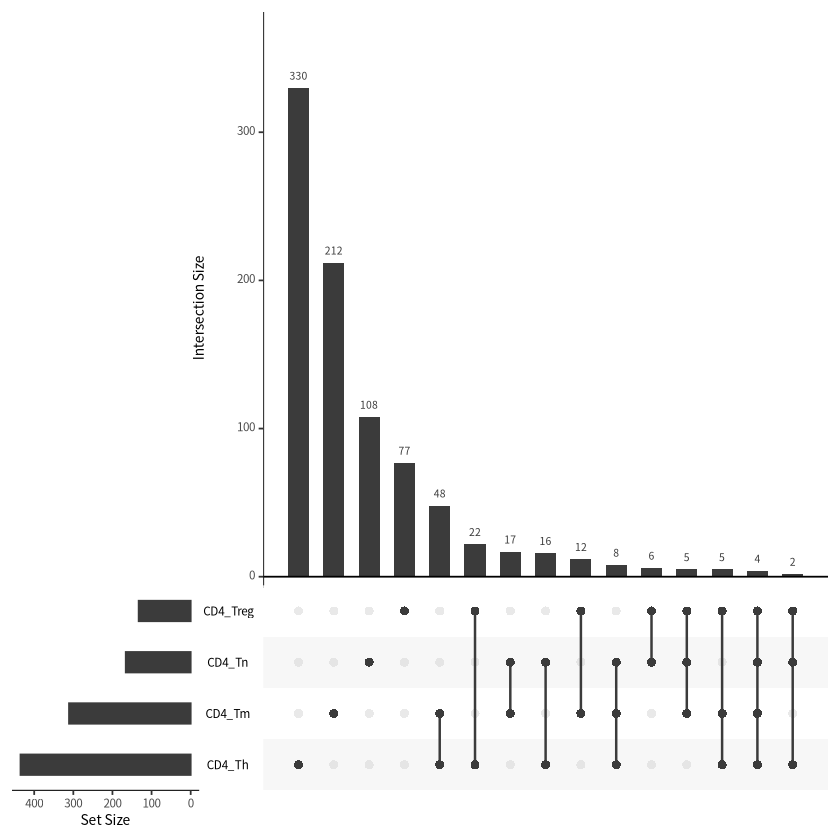

In [15]:
upset(mat, nsets = ncol(mat), order.by = "freq")

### ieQTL 举例

In [8]:
ieQTL <- subset(merged_df, term %in% c('G','G:pheno'))
ieQTL

X     gene     snp                term    Estimate_full Std_Error_full
59       59  ABHD18   4_127663425_A_[G]  G        0.12955112   0.03005253    
60       60  ABHD18   4_127663425_A_[G]  G:pheno -0.53542592   0.18978838    
213     213  ADAM10   15_58478324_C_[T]  G        0.20242271   0.02903276    
214     214  ADAM10   15_58478324_C_[T]  G:pheno  0.43062590   0.14273261    
479     479  ANKRD17  4_72199446_A_[T]   G        0.09802535   0.02436443    
480     480  ANKRD17  4_72199446_A_[T]   G:pheno -0.36954634   0.16958936    
647     647  ARHGAP15 2_143172348_G_[A]  G        0.03727706   0.02109124    
648     648  ARHGAP15 2_143172348_G_[A]  G:pheno  0.22755879   0.10948855    
675     675  ARHGEF3  3_56740041_G_[A]   G        0.21694798   0.02762704    
676     676  ARHGEF3  3_56740041_G_[A]   G:pheno -0.24996975   0.11016324    
913     913  ATF6     1_161765328_G_[C]  G        0.22512441   0.02187674    
914     914  ATF6     1_161765328_G_[C]  G:pheno -0.27535899   0.11994051    
1109   1109  B2M      15_45182173_C_[A]  G       -0.08626548   0.01667048    
1110   1110  B2M      15_45182173_C_[A]  G:pheno  0.09453534   0.01220901    
1151   1151  BAG6     6_31446975_G_[A]   G       -0.14019629   0.03820915    
1152   1152  BAG6     6_31446975_G_[A]   G:pheno  0.58648211   0.17969425    
1179   1179  BAP1     3_52046954_C_[T]   G       -0.02712211   0.03236886    
1180   1180  BAP1     3_52046954_C_[T]   G:pheno -0.45792942   0.21692381    
1319   1319  BMPR2    2_202240307_A_[C]  G        0.06759382   0.04723389    
1320   1320  BMPR2    2_202240307_A_[C]  G:pheno  0.70481387   0.27830648    
1431   1431  BTN3A2   6_26341332_T_[C]   G       -0.48936466   0.06411165    
1432   1432  BTN3A2   6_26341332_T_[C]   G:pheno  0.50319938   0.11671072    
1641   1641  CAND1    12_67253624_A_[G]  G        0.08510932   0.01820869    
1642   1642  CAND1    12_67253624_A_[G]  G:pheno -0.22456544   0.11146939    
1683   1683  CARD8    19_48252010_T_[C]  G        0.09155009   0.02183532    
1684   1684  CARD8    19_48252010_T_[C]  G:pheno  0.26246573   0.11379778    
1739   1739  CCDC137  17_81663061_C_[T]  G       -0.24851008   0.03852041    
1740   1740  CCDC137  17_81663061_C_[T]  G:pheno  0.60886659   0.22939260    
1753   1753  CCDC14   3_123968407_G_[A]  G       -0.06065214   0.02559970    
1754   1754  CCDC14   3_123968407_G_[A]  G:pheno -0.40953935   0.16359143    
⋮      ⋮     ⋮        ⋮                  ⋮       ⋮             ⋮             
135817  8879 TMEM223  11_62889032_T_[C]  G       -0.483766574  0.12470357    
135818  8880 TMEM223  11_62889032_T_[C]  G:pheno  1.158721988  0.55212473    
135887  8949 TMEM43   3_14809088_T_[A]   G       -0.005167472  0.06787046    
135888  8950 TMEM43   3_14809088_T_[A]   G:pheno -0.761101391  0.30589394    
136041  9103 TRBC1    7_142759494_G_[A]  G        0.089457104  0.03564271    
136042  9104 TRBC1    7_142759494_G_[A]  G:pheno  0.363675669  0.08171238    
136055  9117 TRIM14   9_98091660_T_[C]   G       -0.005495645  0.06727501    
136056  9118 TRIM14   9_98091660_T_[C]   G:pheno -0.607305942  0.27156945    
136069  9131 TRIM22   11_5670298_C_[T]   G       -0.208132574  0.03882506    
136070  9132 TRIM22   11_5670298_C_[T]   G:pheno  0.517628978  0.15136072    
136167  9229 TTC39B   9_15301430_C_[A]   G       -0.081720978  0.08525539    
136168  9230 TTC39B   9_15301430_C_[A]   G:pheno -0.849342086  0.40016190    
136419  9481 USP36    17_78830365_A_[G]  G        0.024572396  0.09897227    
136420  9482 USP36    17_78830365_A_[G]  G:pheno  0.955405037  0.44747033    
136475  9537 VOPP1    7_55714047_G_[A]   G       -0.007734892  0.05735831    
136476  9538 VOPP1    7_55714047_G_[A]   G:pheno -0.518682012  0.25667475    
136573  9635 WDR20    14_101315816_T_[C] G       -0.093280561  0.10566124    
136574  9636 WDR20    14_101315816_T_[C] G:pheno  1.314478179  0.47479112    
136657  9719 YEATS4   12_69414039_A_[T]  G        0.016192071  0.16310505    
136658  9720 YEATS4   12_6941

In [195]:
write.csv(ieQTL,'/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/alldata.csv')

In [18]:
ieQTL <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/alldata.csv')
ieQTL

X.1    X     gene   snp               term          Estimate_full
1      61     61   ABHD18 4_127663425_A_[G] (Intercept)   -2.456070398 
2      62     62   ABHD18 4_127663425_A_[G] age            0.000717666 
3      63     63   ABHD18 4_127663425_A_[G] G              0.055616014 
4      64     64   ABHD18 4_127663425_A_[G] G:pheno       -0.029842794 
5      65     65   ABHD18 4_127663425_A_[G] geno_PC1      -0.118138654 
6      66     66   ABHD18 4_127663425_A_[G] geno_PC2      -0.020691701 
7      67     67   ABHD18 4_127663425_A_[G] PC_1          -0.031757354 
8      68     68   ABHD18 4_127663425_A_[G] PC_2          -0.014256742 
9      69     69   ABHD18 4_127663425_A_[G] PC_3          -0.006681101 
10     70     70   ABHD18 4_127663425_A_[G] PC_4          -0.003435897 
11     71     71   ABHD18 4_127663425_A_[G] PC_5          -0.012573089 
12     72     72   ABHD18 4_127663425_A_[G] pct_counts_mt -0.018169246 
13     73     73   ABHD18 4_127663425_A_[G] pheno         -0.076408855 
14     74     74   ABHD18 4_127663425_A_[G] total_counts   0.328496215 
15     75     75   ABHD18 4_127663425_A_[G] treat_time     0.023293161 
16    226    226   ADAM10 15_58478324_C_[T] (Intercept)   -1.269397676 
17    227    227   ADAM10 15_58478324_C_[T] age           -0.002353388 
18    228    228   ADAM10 15_58478324_C_[T] G              0.257009633 
19    229    229   ADAM10 15_58478324_C_[T] G:pheno        0.025056553 
20    230    230   ADAM10 15_58478324_C_[T] geno_PC1      -0.028226215 
21    231    231   ADAM10 15_58478324_C_[T] geno_PC2      -0.218248488 
22    232    232   ADAM10 15_58478324_C_[T] PC_1          -0.041250125 
23    233    233   ADAM10 15_58478324_C_[T] PC_2          -0.019471212 
24    234    234   ADAM10 15_58478324_C_[T] PC_3          -0.026566351 
25    235    235   ADAM10 15_58478324_C_[T] PC_4          -0.026344385 
26    236    236   ADAM10 15_58478324_C_[T] PC_5           0.007401527 
27    237    237   ADAM10 15_58478324_C_[T] pct_counts_mt -0.022555309 
28    238    238   ADAM10 15_58478324_C_[T] pheno         -0.005442578 
29    239    239   ADAM10 15_58478324_C_[T] total_counts   0.241731604 
30    240    240   ADAM10 15_58478324_C_[T] treat_time     0.007355890 
⋮     ⋮      ⋮     ⋮      ⋮                 ⋮             ⋮            
17251 146641 10636 ZNF277 7_111870774_C_[T] (Intercept)   -1.733618393 
17252 146642 10637 ZNF277 7_111870774_C_[T] age           -0.003979245 
17253 146643 10638 ZNF277 7_111870774_C_[T] G             -0.197794608 
17254 146644 10639 ZNF277 7_111870774_C_[T] G:pheno        0.060852943 
17255 146645 10640 ZNF277 7_111870774_C_[T] geno_PC1      -0.059837395 
17256 146646 10641 ZNF277 7_111870774_C_[T] geno_PC2      -0.319672011 
17257 146647 10642 ZNF277 7_111870774_C_[T] PC_1           0.021128167 
17258 146648 10643 ZNF277 7_111870774_C_[T] PC_2          -0.019722009 
17259 146649 10644 ZNF277 7_111870774_C_[T] PC_3           0.050323655 
17260 146650 10645 ZNF277 7_111870774_C_[T] PC_4           0.008664083 
17261 146651 10646 ZNF277 7_111870774_C_[T] PC_5           0.003375464 
17262 146652 10647 ZNF277 7_111870774_C_[T] pct_counts_mt -0.024147294 
17263 146653 10648 ZNF277 7_111870774_C_[T] pheno         -0.038858435 
17264 146654 10649 ZNF277 7_111870774_C_[T] total_counts   0.398119896 
17265 146655 10650 ZNF277 7_111870774_C_[T] treat_time    -0.006348000 
17266 146746 10741 ZNF90  19_19874707_T_[C] (Intercept)   -1.199510491 
17267 146747 10742 ZNF90  19_19874707_T_[C] age           -0.003635494 
17268 146748 10743 ZNF90  19_19874707_T_[C] G             -0.261750151 
17269 146749 10744 ZNF90  19_19874707_T_[C] G:pheno        0.033511562 
17270 146750 10745 ZNF90  19_19874707_T_[C] geno_PC1       0.584579748 
17271 146751 10746 ZNF90  19_19874707_T_[C] geno_PC2       1.476014465 
17272 146752 10747 ZNF90  19_19874707_T_[C] PC_1          -0.041950719 
17273 146753 10748 ZNF90  19_19874707_T_[C] PC_2           0.028442761 
17274 146754 10749 ZNF90  19_19874707_T_[C] PC

In [19]:
unique(ieQTL$celltype)

[1] "CD4_Naive_T-CCR7"   "CD4_Naive_T-SOX4"   "CD4_Tcm-CXCR5"     
 [4] "CD4_Tcm-GPR183"     "CD4_Tcm-IFIT3"      "CD4_Tcm-SOX4"      
 [7] "CD4_Tem-CCR7neg"    "CD4_Tfh_like-CXCR5" "CD4_Th-TNFRSF11A"  
[10] "CD4_Th1-GZMK"       "CD4_Th17-RORC"      "CD4_Th22-CCR10"    
[13] "CD4_Treg-FCRL3"     "CD4_Treg-FOXP3"

In [53]:
for (ct in unique(ieQTL$celltype)) {
    folder_path <- file.path("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/figures/", ct)
    if (!dir.exists(folder_path)) {
    dir.create(folder_path, recursive = TRUE)}
  
    tmp1 <- subset(ieQTL, celltype %in% ct)
    
    # 基因表达
    ge.df <- fread(paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/input/phenofile/',ct,'.txt'), sep='\t') %>% column_to_rownames("cell_barcode")
    
    # 协变量
    covariates.df <- fread('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/input/ieQTL/covariates.df.csv') %>% column_to_rownames("cellbarcode")
    covariates.df <- covariates.df[rownames(ge.df),]
    covariates.df <- cbind(ge.df[,c(1:16)], covariates.df$Inflammatory_Module)
    colnames(covariates.df)[17] <- 'Inflammatory_Module'
    
    # 基因型
    gt.df <- fread('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/input/ieQTL/gt.df.bulk.csv') %>% column_to_rownames("V1") %>% tibble::rownames_to_column("orig.ident")
    gt.df <- data.frame(orig.ident = ge.df[,1], row.names = rownames(ge.df)) %>% left_join(gt.df, by = "orig.ident")
    rownames(gt.df) <- rownames(ge.df)
    
    for (ge in unique(tmp1$gene)) {
        snp <- unique(subset(tmp1, gene %in% ge)$snp)
        
        ge.df_sub <- ge.df[,c('orig.ident','stage',ge)]
        covariates.df_sub <- covariates.df[,c('orig.ident', 'Inflammatory_Module')]
        gt.df_sub <- gt.df[,c('orig.ident', snp)]

        tmp <- cbind(ge.df_sub, covariates.df_sub, gt.df_sub)
        tmp <- tmp[,-c(4,6)]

        # 转换基因型
        tmp <- tmp %>% mutate(stage = ifelse(stage == "HDs", "0", 
                                             ifelse(stage == "IRs", "1", 
                                                    ifelse(stage == "INRs", "2", NA))))
        tmp$stage <- as.numeric(tmp$stage)

        # 按样本聚合
        tmp_summary <- tmp %>% group_by(orig.ident) %>% summarise(stage = mean(stage, na.rm = TRUE),
                                                                  expr = mean(.data[[ge]], na.rm = TRUE),
                                                                  Inflammatory_Module = mean(Inflammatory_Module, na.rm = TRUE),
                                                                  geno = mean(.data[[snp]], na.rm = TRUE))

        tmp_summary <- tmp_summary %>% mutate(Inflammatory_Module_group = cut(Inflammatory_Module,
                                                                              breaks = quantile(Inflammatory_Module, probs = c(0, 1/3, 2/3, 1), na.rm = TRUE),
                                                                              labels = c("Low", "Mid", "High"),
                                                                              include.lowest = TRUE))

        p1 <- ggplot(tmp_summary, aes(x = factor(geno), y = expr, fill = factor(geno), color = factor(geno))) +
              geom_boxplot(width = 0.5, outlier.size = 0.5, position = position_dodge(0.8), alpha = 0.5) +
              geom_jitter(size = 1.5, position = position_jitter(width = 0.15, height = 0), alpha = 0.75) +
              scale_fill_manual(values = c("0" = "#BB88AB", "1" = "#AE5F81", "2" = "#824D58")) +
              scale_color_manual(values = c("0" = "#BB88AB", "1" = "#AE5F81", "2" = "#824D58")) +
              geom_smooth(aes(group = 1), method = "lm", se = FALSE, color = "#8A184C") +
              facet_wrap(~Inflammatory_Module_group, ncol = 3) +
              labs(title = paste0(ct, "|", ge, "|", snp),x = snp,y = ge) +
              mytheme
        
        ggsave(filename = paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/figures/',ct, '/', ct, '_', ge, '_', snp, '_boxplot_1.pdf'),
               plot = p1, width = 6, height = 5)

        p2 <- ggplot(tmp_summary, aes(x = factor(geno), y = expr, fill = factor(geno), color = factor(geno))) +
              geom_boxplot(width = 0.5, outlier.size = 0.5, position = position_dodge(0.8), alpha = 0.5) +
              geom_jitter(size = 1.5, position = position_jitter(width = 0.15, height = 0), alpha = 0.75) +
              scale_fill_manual(values = c("0" = "#BB88AB", "1" = "#AE5F81", "2" = "#824D58")) +
              scale_color_manual(values = c("0" = "#BB88AB", "1" = "#AE5F81", "2" = "#824D58")) +
              geom_smooth(aes(group = 1), method = "lm", se = FALSE, color = "#8A184C") +
              facet_wrap(~ stage + Inflammatory_Module_group, ncol = 9) +
              labs(title = paste0(ct, "|", ge, "|", snp),x = snp,y = ge) +
              mytheme
        ggsave(filename = paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/figures/',ct, '/', ct, '_', ge, '_', snp, '_boxplot_2.pdf'),
               plot = p2, width = 12, height = 5)
        }
    }

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropp

### 平滑拟合

#### CD4 Naive T−CCR7 CARD8

In [3]:
ct <- 'CD4_Naive_T-CCR7'

ieQTL <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/alldata.csv')
tmp1 <- subset(ieQTL, celltype %in% ct)

# 基因表达
ge.df <- fread(paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/input/phenofile/',ct,'.txt'), sep='\t') %>% column_to_rownames("cell_barcode")
    
# 协变量
covariates.df <- fread('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/input/ieQTL/covariates.df.csv') %>% column_to_rownames("cellbarcode")
covariates.df <- covariates.df[rownames(ge.df),]
covariates.df <- cbind(ge.df[,c(1:16)], covariates.df$Inflammatory_Module)
colnames(covariates.df)[17] <- 'Inflammatory_Module'
    
# 基因型
gt.df <- fread('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/input/ieQTL/gt.df.bulk.csv') %>% column_to_rownames("V1") %>% tibble::rownames_to_column("orig.ident")
gt.df <- data.frame(orig.ident = ge.df[,1], row.names = rownames(ge.df)) %>% left_join(gt.df, by = "orig.ident")
rownames(gt.df) <- rownames(ge.df)

In [4]:
ge <- 'CARD8'
snp <- unique(subset(tmp1, gene %in% ge)$snp)
        
ge.df_sub <- ge.df[,c('orig.ident','stage',ge)]
covariates.df_sub <- covariates.df[,c('orig.ident', 'Inflammatory_Module')]
gt.df_sub <- gt.df[,c('orig.ident', snp)]

tmp <- cbind(ge.df_sub, covariates.df_sub, gt.df_sub)
tmp <- tmp[,-c(4,6)]
tmp$CARD8 <- as.numeric(log(tmp$CARD8+1))
tmp

orig.ident stage CARD8     Inflammatory_Module
HD-H134-1-CELL24_N1   HD-H134    HDs   0.0000000 -1.14633473        
HD-H134-1-CELL103_N1  HD-H134    HDs   0.0000000 -0.77084085        
HD-H134-1-CELL104_N1  HD-H134    HDs   0.0000000 -0.23902007        
HD-H134-1-CELL180_N1  HD-H134    HDs   0.6931472 -0.07112301        
HD-H134-1-CELL287_N1  HD-H134    HDs   0.0000000 -0.53096584        
HD-H134-1-CELL319_N1  HD-H134    HDs   0.0000000 -1.20017576        
HD-H134-1-CELL434_N1  HD-H134    HDs   0.6931472 -0.39593943        
HD-H134-1-CELL495_N2  HD-H134    HDs   1.3862944  0.68499482        
HD-H134-1-CELL503_N2  HD-H134    HDs   0.6931472 -1.59273597        
HD-H134-1-CELL553_N2  HD-H134    HDs   0.6931472 -0.38456575        
HD-H134-1-CELL744_N1  HD-H134    HDs   0.0000000 -0.22674755        
HD-H134-1-CELL854_N1  HD-H134    HDs   0.0000000 -1.20967699        
HD-H134-1-CELL870_N1  HD-H134    HDs   0.6931472 -0.32124910        
HD-H134-1-CELL942_N2  HD-H134    HDs   0.6931472  0.03113571        
HD-H134-1-CELL954_N2  HD-H134    HDs   0.0000000  0.40999331        
HD-H134-1-CELL980_N2  HD-H134    HDs   0.0000000 -0.42116747        
HD-H134-1-CELL992_N1  HD-H134    HDs   0.0000000 -0.84030980        
HD-H134-1-CELL1062_N2 HD-H134    HDs   0.0000000 -0.20047197        
HD-H134-1-CELL1163_N1 HD-H134    HDs   0.0000000 -0.34881552        
HD-H134-1-CELL1249_N2 HD-H134    HDs   0.0000000  0.02916974        
HD-H134-1-CELL1381_N2 HD-H134    HDs   0.0000000  0.45537456        
HD-H134-1-CELL1435_N2 HD-H134    HDs   0.0000000 -0.49717165        
HD-H134-1-CELL1437_N2 HD-H134    HDs   0.0000000  0.01019377        
HD-H134-1-CELL1597_N2 HD-H134    HDs   0.6931472  0.48746245        
HD-H134-1-CELL1875_N1 HD-H134    HDs   0.0000000 -0.10990759        
HD-H134-1-CELL1880_N1 HD-H134    HDs   0.0000000 -0.07862388        
HD-H134-1-CELL2134_N1 HD-H134    HDs   0.0000000 -0.35206582        
HD-H134-1-CELL2220_N2 HD-H134    HDs   0.0000000  0.15274448        
HD-H134-1-CELL2226_N2 HD-H134    HDs   0.0000000 -0.05458507        
HD-H134-1-CELL2276_N1 HD-H134    HDs   0.0000000 -0.39114738        
⋮                     ⋮          ⋮     ⋮         ⋮                  
PD-H308-1-CELL4642_N1 PD-H308    IRs   0.0000000 -1.22177304        
PD-H308-1-CELL4788_N1 PD-H308    IRs   0.0000000 -0.28849850        
PD-H308-1-CELL4820_N1 PD-H308    IRs   0.0000000 -0.03094652        
PD-H308-1-CELL4978_N1 PD-H308    IRs   0.0000000 -1.34592991        
PD-H308-1-CELL4983_N1 PD-H308    IRs   0.0000000  0.41548978        
PD-H308-1-CELL4992_N1 PD-H308    IRs   0.0000000 -0.66379554        
PD-H308-1-CELL4995_N1 PD-H308    IRs   1.3862944  0.63325657        
PD-H308-1-CELL5017_N1 PD-H308    IRs   0.0000000  0.34469210        
PD-H308-1-CELL5028_N1 PD-H308    IRs   0.0000000  0.78298092        
PD-H308-1-CELL5049_N1 PD-H308    IRs   0.6931472 -1.02820308        
PD-H308-1-CELL5059_N1 PD-H308    IRs   0.0000000 -0.86470827        
PD-H308-1-CELL5072_N1 PD-H308    IRs   0.0000000  0.19541799        
PD-H308-1-CELL5083_N1 PD-H308    IRs   0.0000000 -1.90284882        
PD-H308-1-CELL5111_N1 PD-H308    IRs   0.0000000 -1.49365094        
PD-H308-1-CELL5133_N1 PD-H308    IRs   0.0000000 -0.87715198        
PD-H308-1-CELL5286_N1 PD-H308    IRs   0.0000000 -0.24824025        
PD-H308-1-CELL5334_N1 PD-H308    IRs   0.0000000 -1.67722268        
PD-H308-1-CELL5340_N1 PD-H308    IRs   0.0000000 -1.37563069        
PD-H308-1-CELL5379_N1 PD-H308    IRs   0.0000000 -1.29504092        
PD-H308-1-CELL5453_N1 PD-H308    IRs   0.0000000  0.38528779        
PD-H308-1-CELL5469_N1 PD-H308    IRs   0.0000000 -1.15841668        
PD-H308-1-CELL5496_N1 PD-H308    IRs   0.6931472 -0.10601448        
PD-H308-1-CELL5562_N1 PD-H308    IRs   1.0986123 -0.57396014        
PD-H308-1-CELL5591_N1 PD-H308    IRs   0.0000000 -0.91105446        
PD-H308-1-CELL5617_N1 PD-H308    IRs   0.0000000  0.03840763        
PD-H308-1-CELL5640_N1 PD-H308    IRs   0.0000000 -0.04165210        
PD-H308-1-CELL5645_N

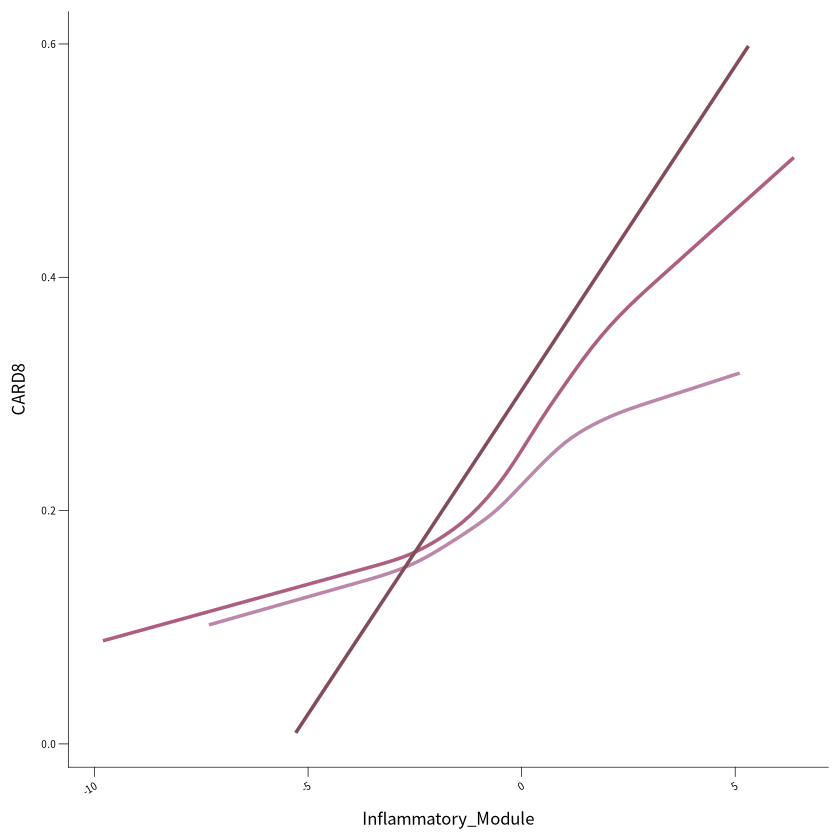

In [9]:
p <- ggplot(tmp, aes(x = Inflammatory_Module, y = CARD8, color = factor(`19_48252010_T_[C]`))) +
     geom_smooth(method = "gam", formula = y ~ s(x, k = 20), se = FALSE,size = 1) +
     scale_color_manual(values = c("0" = "#BB88AB", "1" = "#AE5F81", "2" = "#824D58")) +
     mytheme
p

In [10]:
ggsave('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/figures/gam_CARD8.pdf',p)

Saving 7 x 7 in image


#### CD4 Tcm−IFIT3 GZMK

In [11]:
ct <- 'CD4_Tcm-IFIT3'

ieQTL <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/alldata.csv')
tmp1 <- subset(ieQTL, celltype %in% ct)

# 基因表达
ge.df <- fread(paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/input/phenofile/',ct,'.txt'), sep='\t') %>% column_to_rownames("cell_barcode")
    
# 协变量
covariates.df <- fread('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/input/ieQTL/covariates.df.csv') %>% column_to_rownames("cellbarcode")
covariates.df <- covariates.df[rownames(ge.df),]
covariates.df <- cbind(ge.df[,c(1:16)], covariates.df$Inflammatory_Module)
colnames(covariates.df)[17] <- 'Inflammatory_Module'
    
# 基因型
gt.df <- fread('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/input/ieQTL/gt.df.bulk.csv') %>% column_to_rownames("V1") %>% tibble::rownames_to_column("orig.ident")
gt.df <- data.frame(orig.ident = ge.df[,1], row.names = rownames(ge.df)) %>% left_join(gt.df, by = "orig.ident")
rownames(gt.df) <- rownames(ge.df)

In [12]:
ge <- 'GZMK'
snp <- unique(subset(tmp1, gene %in% ge)$snp)
        
ge.df_sub <- ge.df[,c('orig.ident','stage',ge)]
covariates.df_sub <- covariates.df[,c('orig.ident', 'Inflammatory_Module')]
gt.df_sub <- gt.df[,c('orig.ident', snp)]

tmp <- cbind(ge.df_sub, covariates.df_sub, gt.df_sub)
tmp <- tmp[,-c(4,6)]
tmp$GZMK <- as.numeric(log(tmp$GZMK+1))
tmp

orig.ident stage GZMK      Inflammatory_Module
HD-H134-1-CELL742_N2  HD-H134    HDs   1.6094379  1.42593615        
HD-H134-1-CELL1164_N2 HD-H134    HDs   0.0000000 -0.71636931        
HD-H134-1-CELL1441_N2 HD-H134    HDs   0.6931472 -0.23320671        
HD-H134-1-CELL1584_N2 HD-H134    HDs   0.6931472  0.87800748        
HD-H134-1-CELL1667_N2 HD-H134    HDs   0.0000000  0.82343697        
HD-H134-1-CELL1827_N2 HD-H134    HDs   0.0000000  1.13475553        
HD-H134-1-CELL1835_N2 HD-H134    HDs   0.0000000 -0.05462887        
HD-H134-1-CELL2025_N1 HD-H134    HDs   0.0000000  0.67794140        
HD-H134-1-CELL2095_N2 HD-H134    HDs   0.0000000 -0.10515571        
HD-H134-1-CELL2264_N2 HD-H134    HDs   0.0000000  1.08554595        
HD-H134-1-CELL2300_N1 HD-H134    HDs   0.0000000  0.48836244        
HD-H134-1-CELL2338_N2 HD-H134    HDs   0.0000000 -0.47153027        
HD-H134-1-CELL2460_N2 HD-H134    HDs   0.0000000  2.03365689        
HD-H134-1-CELL2516_N2 HD-H134    HDs   0.6931472 -1.23035729        
HD-H134-1-CELL2584_N1 HD-H134    HDs   0.0000000 -0.16042765        
HD-H134-1-CELL2613_N2 HD-H134    HDs   0.0000000  0.10048281        
HD-H134-1-CELL2731_N2 HD-H134    HDs   0.0000000  0.84173364        
HD-H134-1-CELL3027_N1 HD-H134    HDs   0.0000000 -0.65696868        
HD-H134-1-CELL3109_N1 HD-H134    HDs   0.6931472  1.03236642        
HD-H134-1-CELL3168_N1 HD-H134    HDs   0.0000000  0.49839769        
HD-H134-1-CELL3302_N1 HD-H134    HDs   0.0000000  1.82456405        
HD-H134-1-CELL3423_N1 HD-H134    HDs   0.0000000  0.94465329        
HD-H134-1-CELL3793_N1 HD-H134    HDs   0.0000000  1.61239094        
HD-H134-1-CELL3887_N1 HD-H134    HDs   0.6931472  1.81044897        
HD-H134-1-CELL3956_N1 HD-H134    HDs   0.0000000  1.96315295        
HD-H134-1-CELL4172_N1 HD-H134    HDs   0.0000000  1.19883903        
HD-H134-1-CELL4437_N1 HD-H134    HDs   0.0000000  0.76156656        
HD-H134-1-CELL4539_N1 HD-H134    HDs   0.0000000 -1.74533088        
HD-H134-1-CELL4657_N1 HD-H134    HDs   1.9459101 -0.28567170        
HD-H134-1-CELL4933_N1 HD-H134    HDs   0.0000000  0.41457996        
⋮                     ⋮          ⋮     ⋮         ⋮                  
PD-H308-1-CELL3154_N1 PD-H308    IRs   0.0000000  1.72359083        
PD-H308-1-CELL3246_N1 PD-H308    IRs   0.0000000  0.35244943        
PD-H308-1-CELL3734_N1 PD-H308    IRs   0.0000000  0.55091462        
PD-H308-1-CELL4843_N1 PD-H308    IRs   0.0000000 -0.56606302        
PD-H308-1-CELL4854_N1 PD-H308    IRs   0.0000000  0.81179854        
PD-H308-1-CELL5011_N1 PD-H308    IRs   0.0000000 -0.04500841        
PD-H308-1-CELL5119_N1 PD-H308    IRs   0.0000000  0.75832282        
PD-H308-1-CELL5429_N1 PD-H308    IRs   1.0986123  0.75784881        
PD-H308-1-CELL5449_N1 PD-H308    IRs   0.0000000 -0.02440960        
PD-H308-1-CELL5599_N1 PD-H308    IRs   0.0000000  0.48524262        
PD-H308-1-CELL5904_N1 PD-H308    IRs   0.0000000  0.72865020        
PD-H308-1-CELL6304_N1 PD-H308    IRs   0.0000000 -0.68223616        
PD-H308-1-CELL6464_N1 PD-H308    IRs   0.0000000 -0.01761770        
PD-H308-1-CELL7150_N1 PD-H308    IRs   0.0000000  1.39000475        
PD-H308-1-CELL7388_N1 PD-H308    IRs   0.0000000  1.08931810        
PD-H308-1-CELL8039_N1 PD-H308    IRs   1.3862944  3.06638247        
PD-H308-1-CELL8298_N1 PD-H308    IRs   0.0000000 -1.59710073        
PD-H308-1-CELL8334_N1 PD-H308    IRs   0.0000000 -0.10666193        
PD-H308-1-CELL8806_N1 PD-H308    IRs   0.0000000  0.03200632        
PD-H308-2-CELL860_N1  PD-H308    IRs   0.0000000 -0.79494414        
PD-H308-2-CELL1002_N1 PD-H308    IRs   0.0000000  2.01751428        
PD-H308-2-CELL1215_N2 PD-H308    IRs   0.0000000  0.33279306        
PD-H308-2-CELL1534_N1 PD-H308    IRs   0.0000000  0.89407719        
PD-H308-2-CELL1856_N2 PD-H308    IRs   0.0000000  0.31815468        
PD-H308-2-CELL1878_N2 PD-H308    IRs   0.0000000 -0.25780849        
PD-H308-2-CELL2228_N3 PD-H308    IRs   0.0000000  1.25932333        
PD-H308-2-CELL2310_N

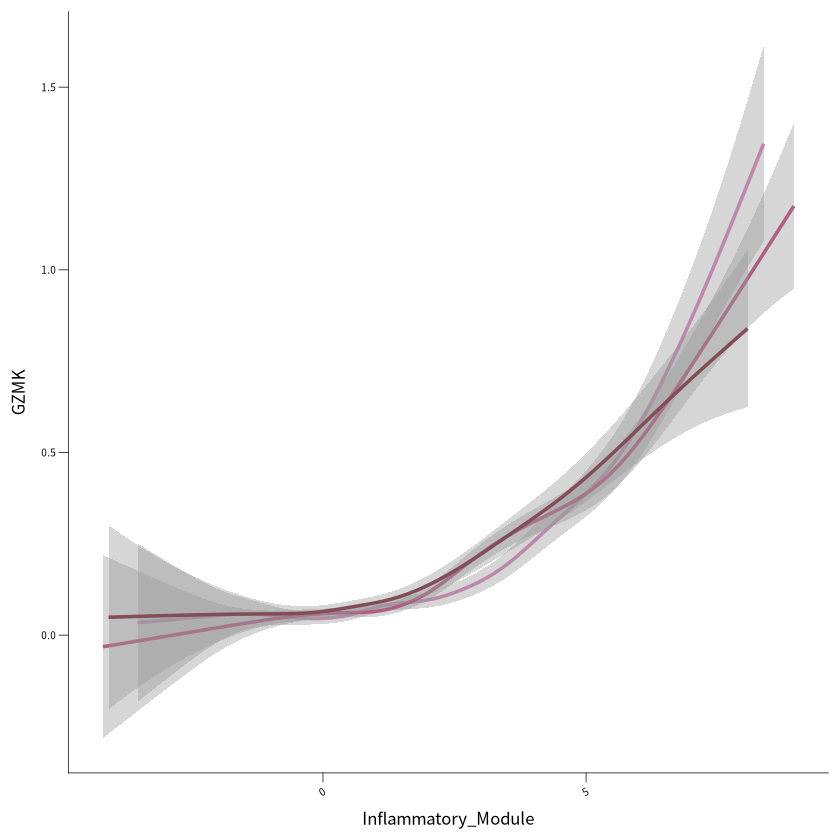

In [14]:
p <- ggplot(tmp, aes(x = Inflammatory_Module, y = GZMK, color = factor(`5_55592081_A_[T]`))) +
     geom_smooth(method = "gam", formula = y ~ s(x, k = 20), se = T,size = 1) +
     scale_color_manual(values = c("0" = "#BB88AB", "1" = "#AE5F81", "2" = "#824D58")) +
     mytheme
p

In [17]:
ggsave('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/result_ieQTL/figures/gam_GZMK.pdf',p)

Saving 7 x 7 in image
